# Structuring a Supervised Machine Leanring Project

**Author**: Elie Kawerk

In this project-based course you will learn how to strcuture a supervised machine learning project using data analysis and machine learning tools. You will learn how to build and validate a statistical/machine learning model. Along the way, you will perform exploratory data analysis, you will run machine learning experiments and you will learn how to structure your codebase properly using OOP and scikit-learn pipelines.

## Scenario, Problem & Dataset Description

You are a data scientist at a real-estate company. Your company has a dataset showing the prices of houses along with 79 features decribing these houses. Your boss wants you to analyze this dataset, come up with a set of insights and to use these data to build a machine learning model that can be used to predict the price of a house based on these 79 features. The target variable here is `SalePrice`.

The dataset can be downloaded from Kaggle using the following link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data. You will perform the analyis using the `train.csv` file.

Here's a description of the different fields you can find in the file:

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Anatomy of the Analysis

Your analysis should have the following anatomy:

1. Loading and inspecting the dataset
2. Exploratory Data Analysis & Visualization
3. Dealing with missing values
4. More EDA
5. Feature Engineering
6. Feature Selection
7. Model Building & Evaluation
8. Model Validation, wrap-up & next steps

### 1. Loading & Inspecting the data 

As a first step, we will start by importing all the libraries that we shall use in our subsequent analysis.

In [1]:
# display dataframes
from IPython.display import display

# logging
import logging

logging.basicConfig(level=logging.INFO)

# default ditct
from collections import defaultdict

# regular expressions
import re

# data analysis
import pandas as pd

# display all columns
pd.set_option('max.columns', None)

# linear algebra
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# model evaluation
from sklearn.model_selection import (train_test_split, 
                                     cross_val_score,
                                     learning_curve,
                                     GridSearchCV, 
                                     KFold)

# metrics
from sklearn.metrics import mean_squared_error as MSE

# persist final model pipeline
from sklearn.externals import joblib

# data preprocessing
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder, 
                                   OneHotEncoder)

# scikit-learn pipelines
from sklearn.pipeline import make_pipeline, FeatureUnion

# base class
from sklearn.base import BaseEstimator, TransformerMixin

# models
from sklearn.linear_model import (Lasso, LassoCV, Ridge, LinearRegression)
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, BaggingRegressor)
from xgboost import XGBRegressor

# Feature selection
from sklearn.feature_selection import SelectFromModel

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
data = pd.read_csv('train.csv')

In [3]:
# inspect head
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# inspect types
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# data shape
rows, cols = data.shape
print(f"The dataset is composed of {rows} rows and {cols} columns.")

The dataset is composed of 1460 rows and 81 columns.


Before starting our analysis, it is important to separate our data intro training and testing set. This is done to avoid over-fitting. There is an element of randomness in dividing the dataset, so remember to set the seed.

In [6]:
# set seed
SEED = 123

# separate data into train and test
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['SalePrice', 'Id']),
                                                    data['SalePrice'], 
                                                    test_size=0.15, random_state=SEED)

In [7]:
print(f"Shape of training features {X_train.shape}")
print(f"Shape of test features {X_test.shape}")

Shape of training features (1241, 79)
Shape of test features (219, 79)


### 2. EDA and Visualization

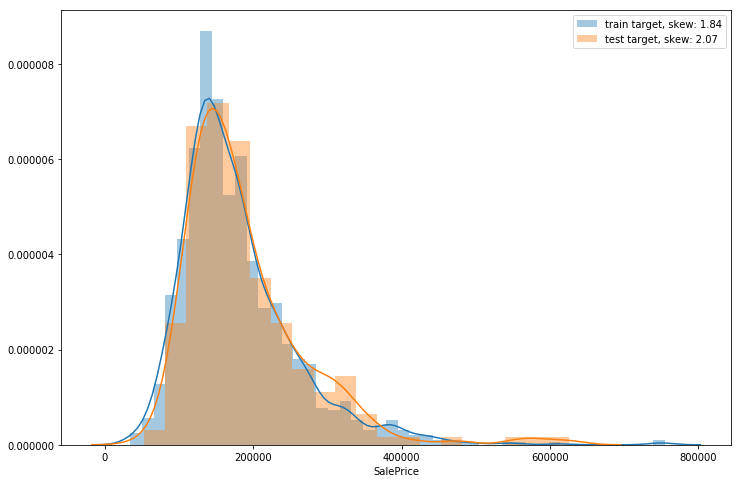

In [8]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(y_train, label=f'train target, skew: {y_train.skew():.2f}')
sns.distplot(y_test, label=f'test target, skew: {y_test.skew():.2f}')
plt.legend(loc='best')
plt.show()

The target variable is positively skewed, we can perform a log transformation to render the target distribution more gaussian like.

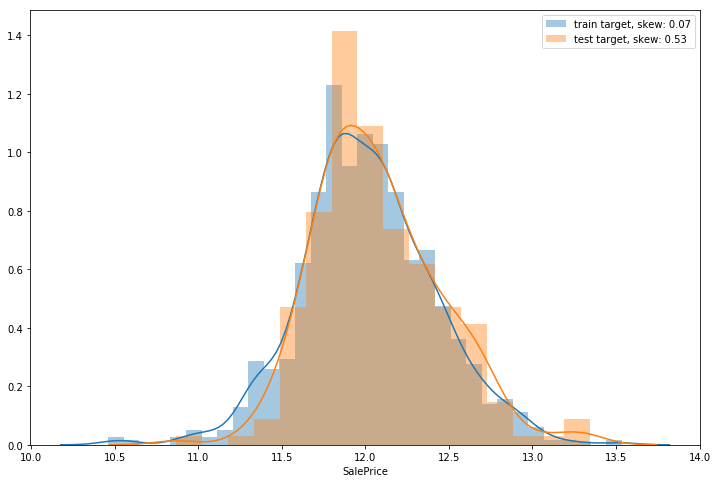

In [9]:
# log transform target
y_train = np.log(y_train)
y_test = np.log(y_test)

# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(y_train, label=f'train target, skew: {y_train.skew():.2f}')
sns.distplot(y_test, label=f'test target, skew: {y_test.skew():.2f}')
plt.legend(loc='best')
plt.show()

It works! the target variable is mich more like a normal distribution after a log transformation.

#### Visualizing Categorical Variables

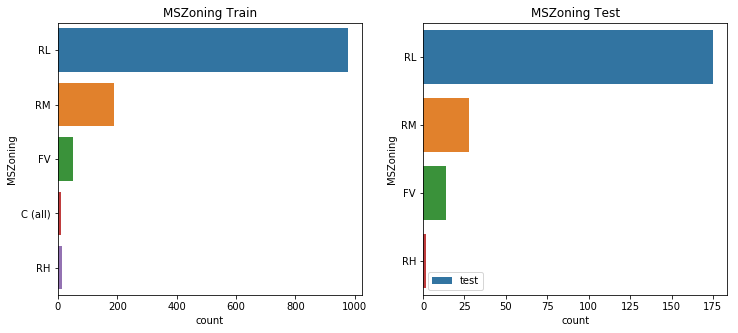

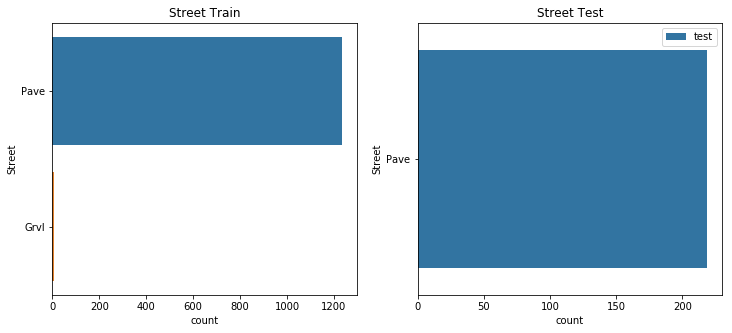

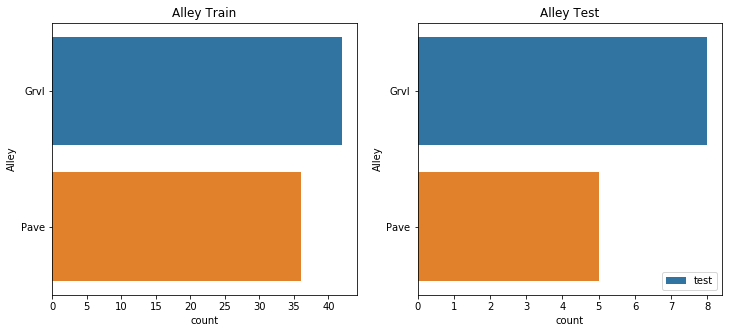

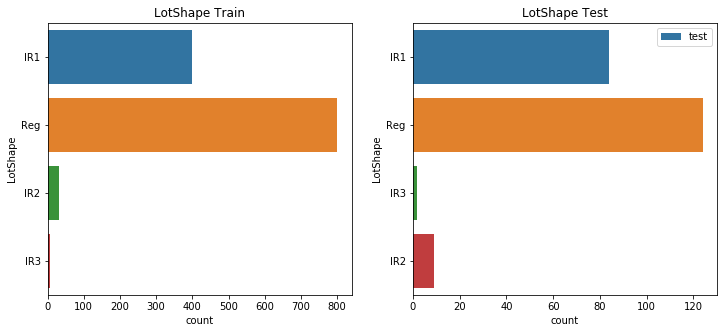

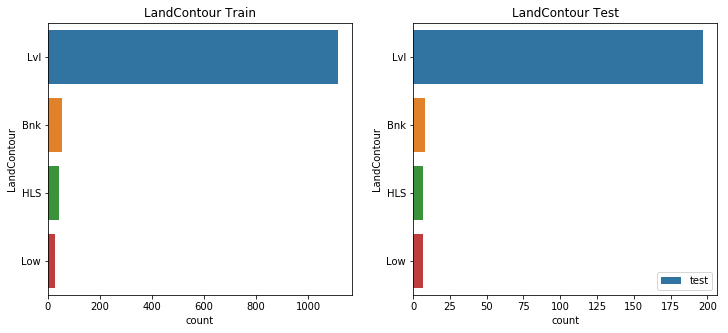

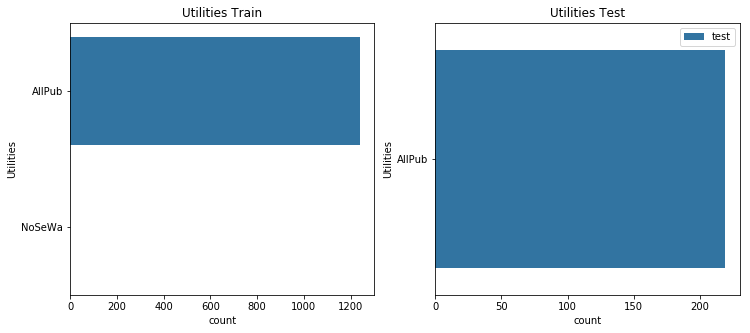

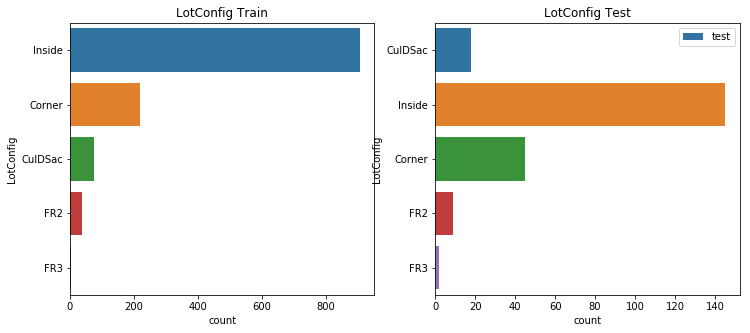

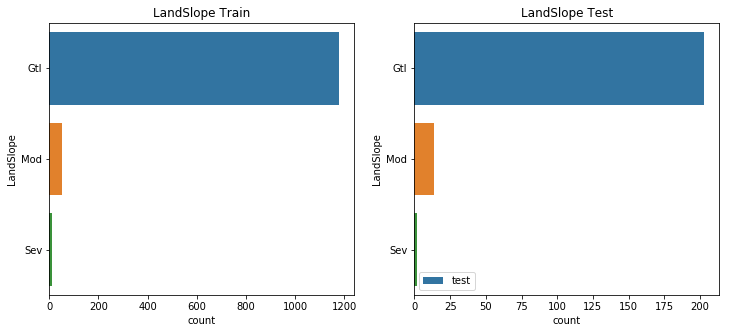

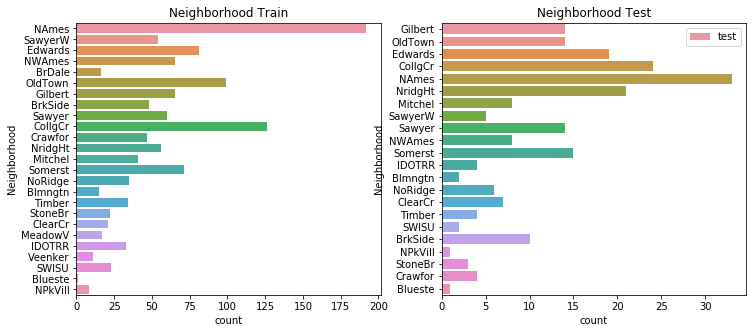

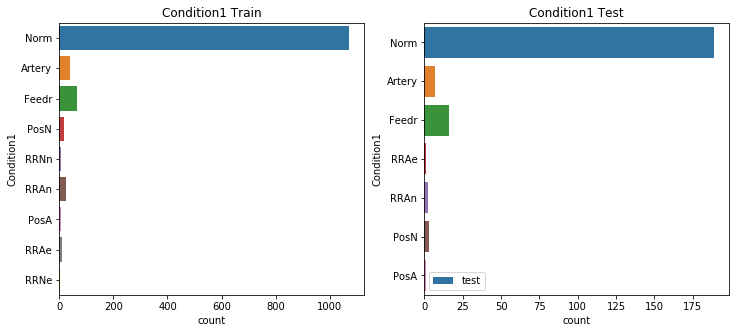

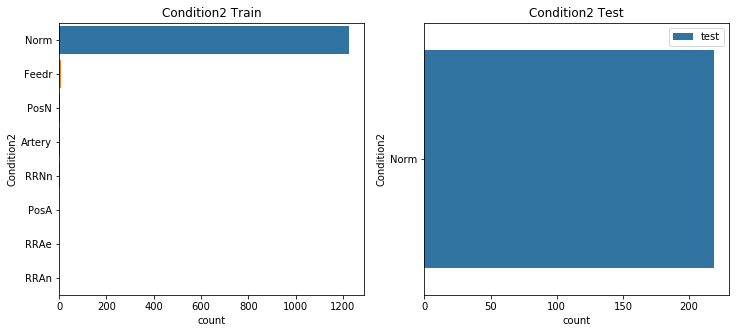

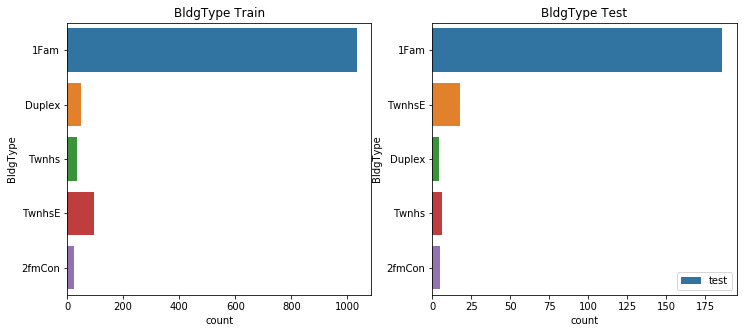

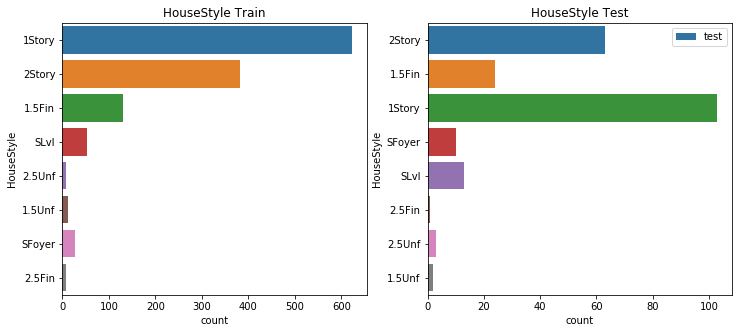

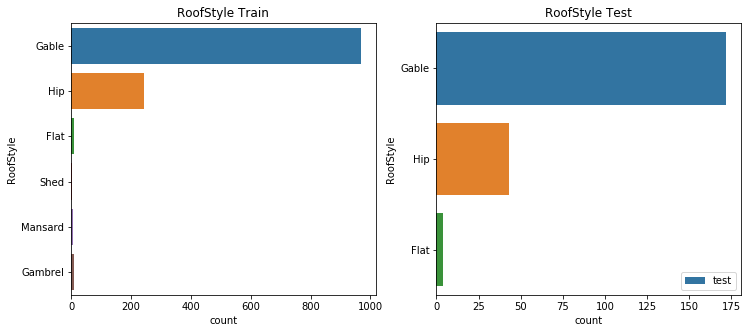

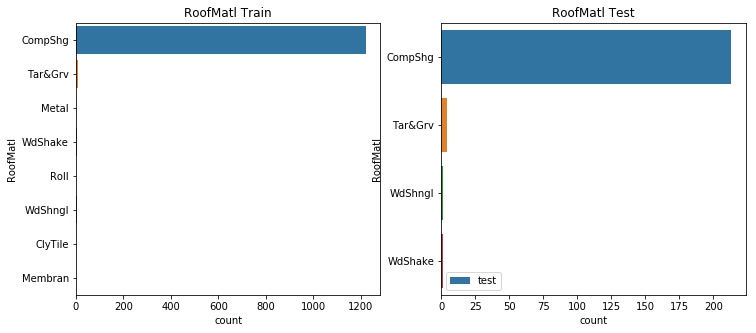

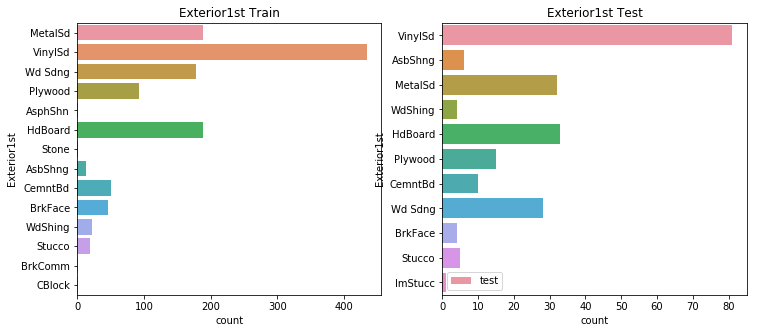

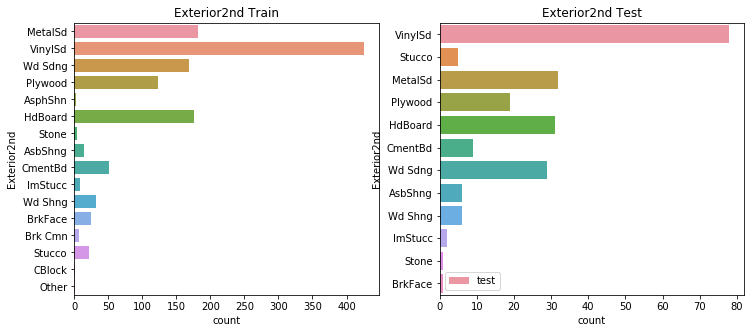

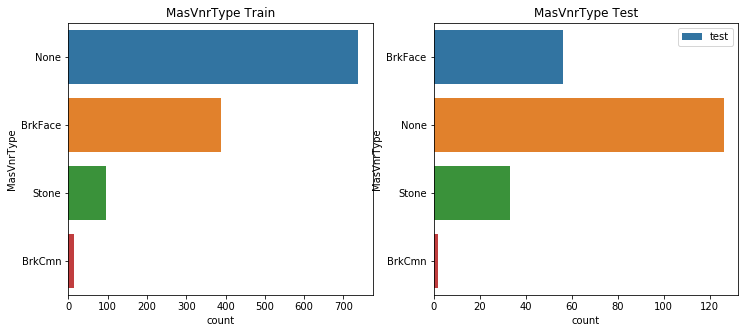

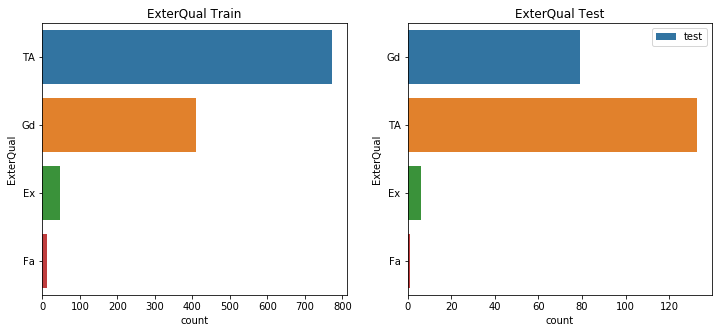

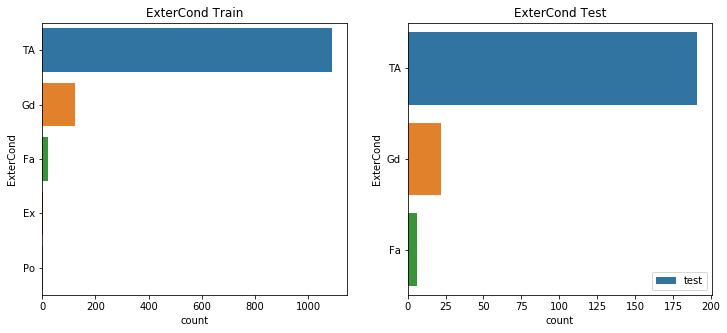

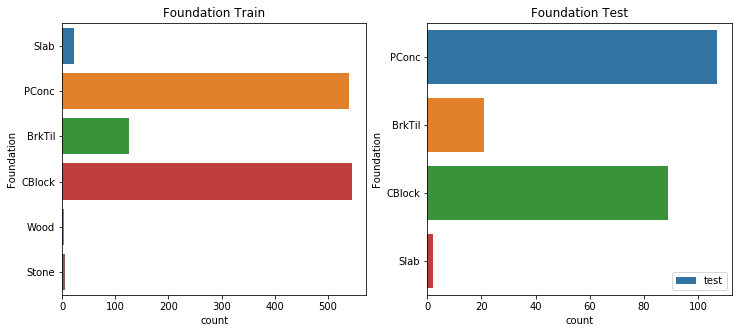

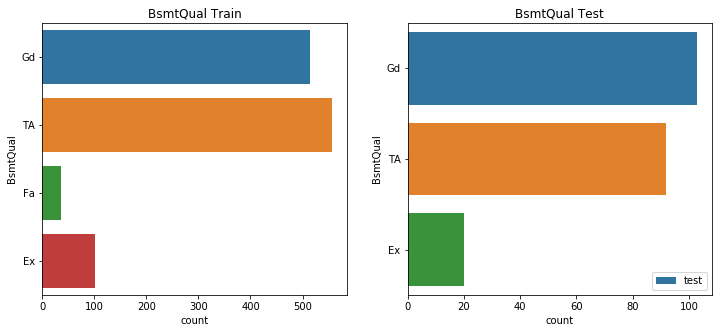

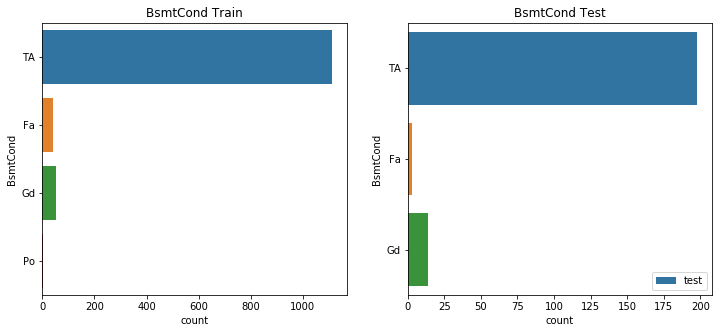

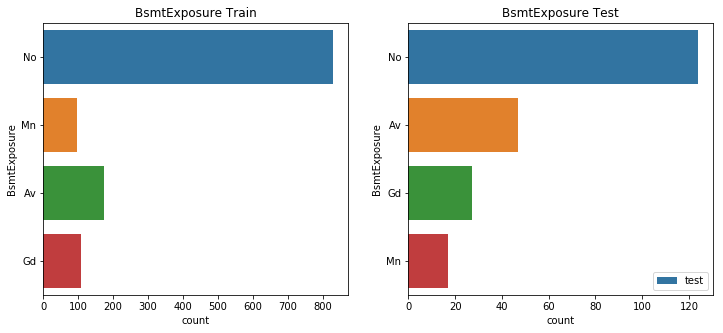

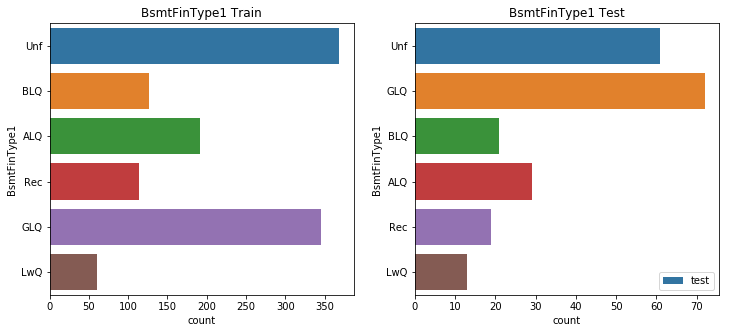

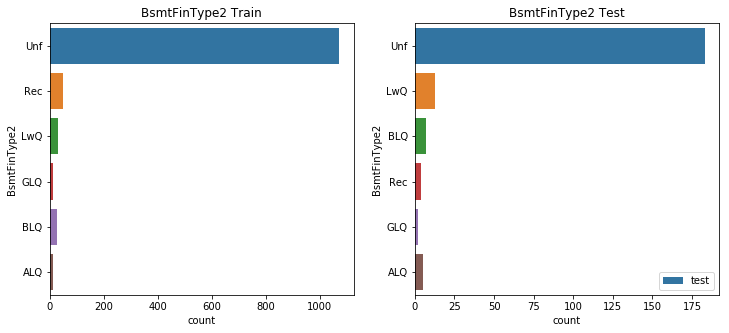

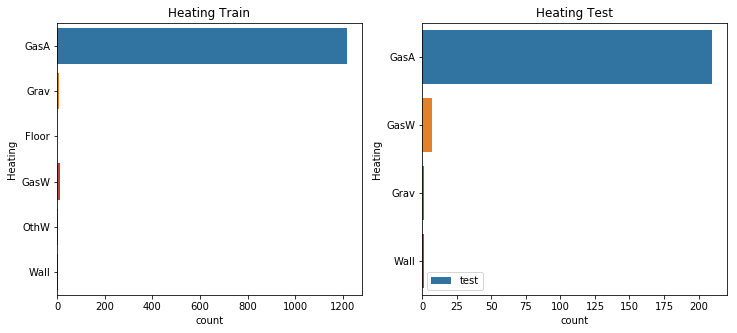

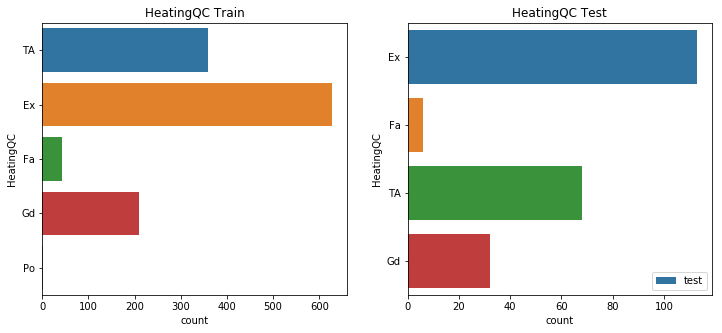

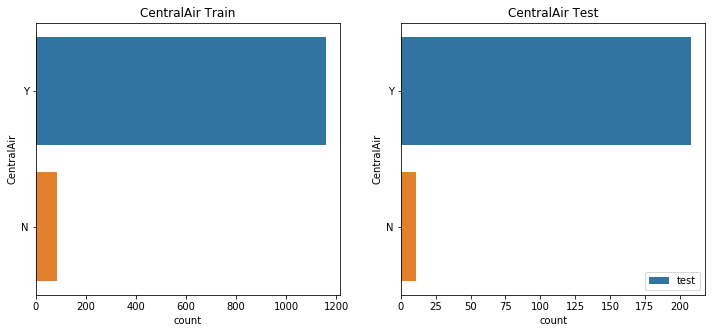

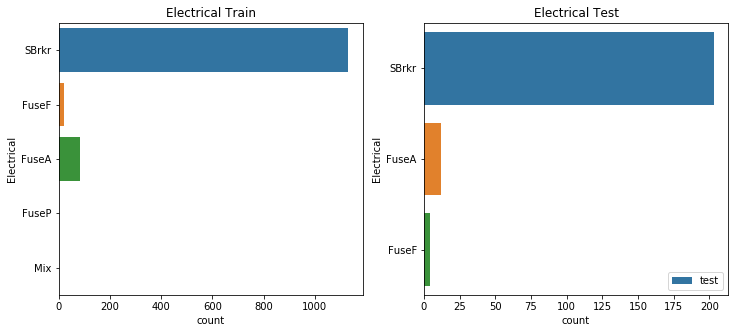

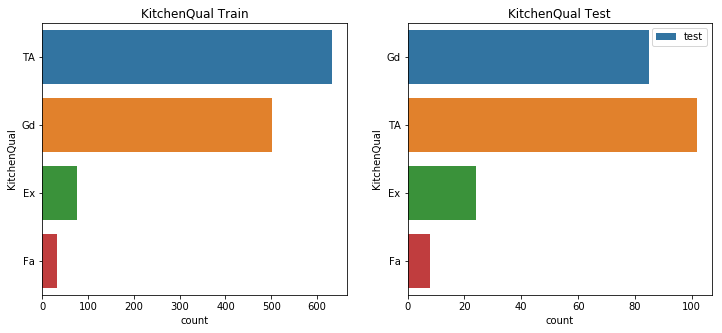

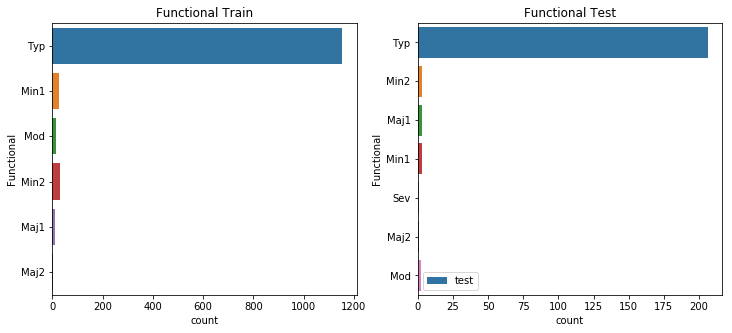

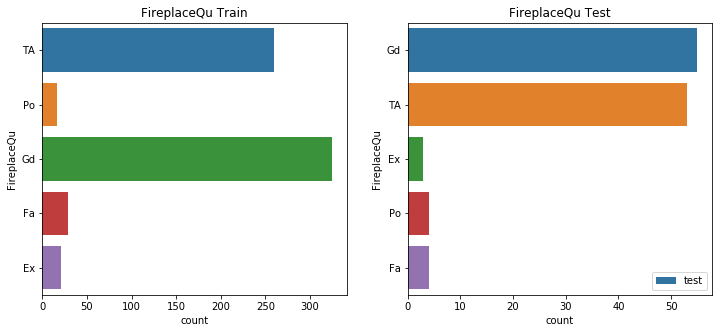

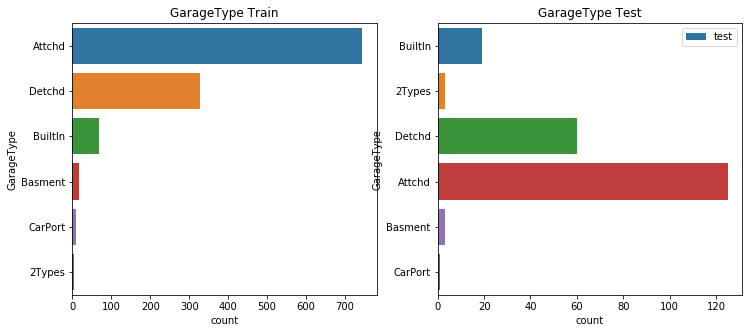

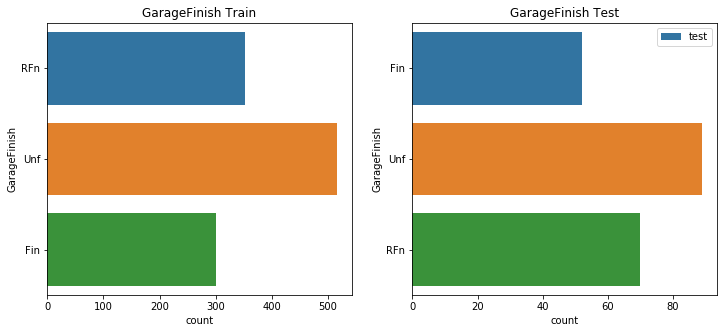

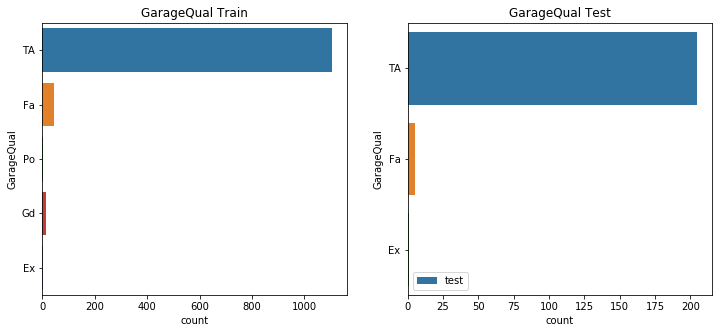

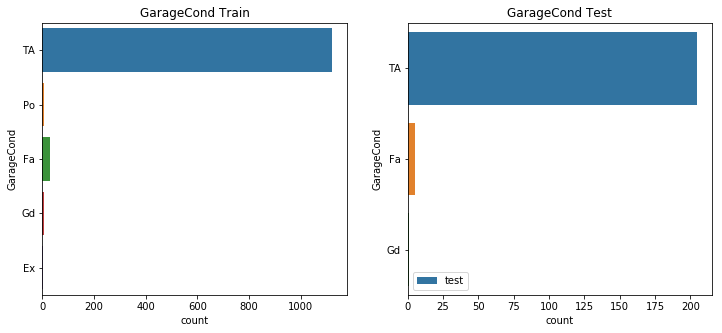

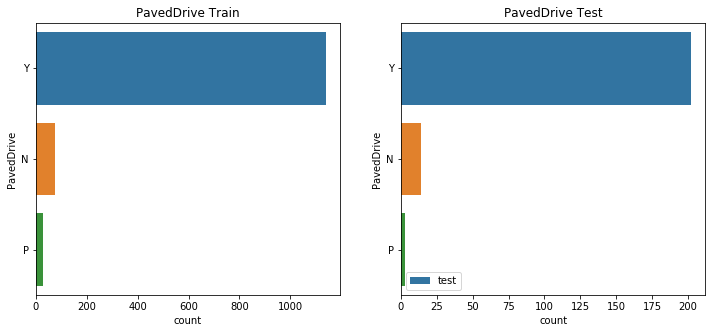

min() arg is an empty sequence


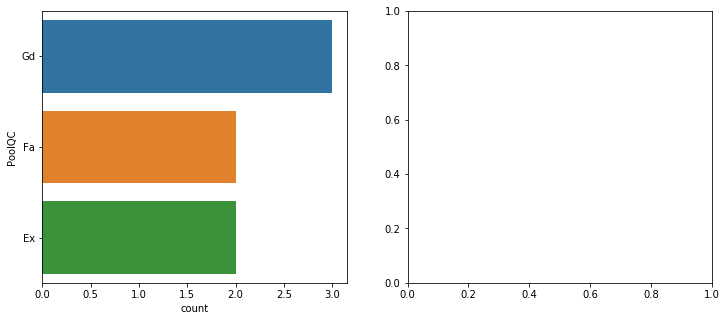

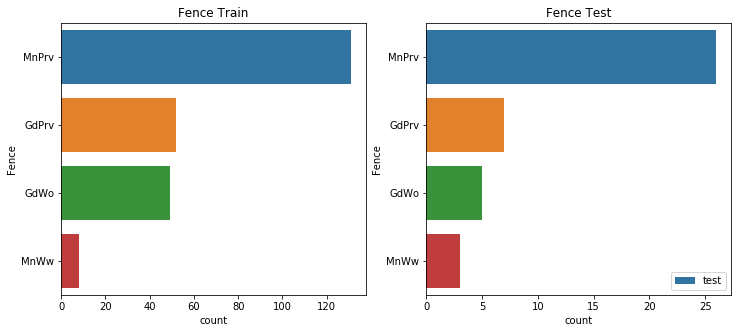

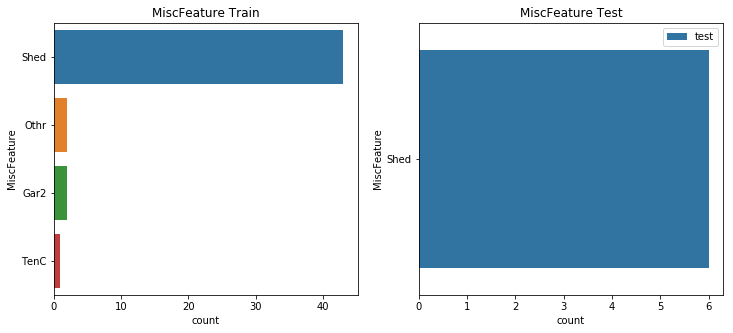

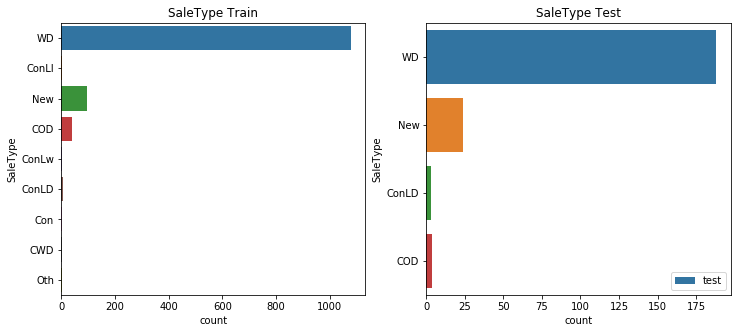

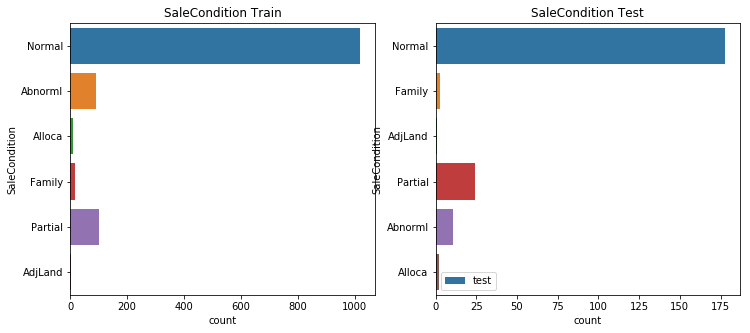

In [10]:
cat_vars = data.select_dtypes(include=['object']).columns.tolist()

for cat_var in cat_vars:
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    try:
        sns.countplot(y=cat_var, data=X_train, label='train', ax=ax[0])
        sns.countplot(y=cat_var, data=X_test, label='test', ax=ax[1])
        ax[0].set_title(cat_var + " Train")
        ax[1].set_title(cat_var + " Test")
        plt.legend(loc='best')
        plt.show()
    except Exception as e:
        print(e)

A lot of the categorical variables have rare labels that appear so little. This hints that we can think of performing feature engineering by grouping rare categories in a single category named "Rare".

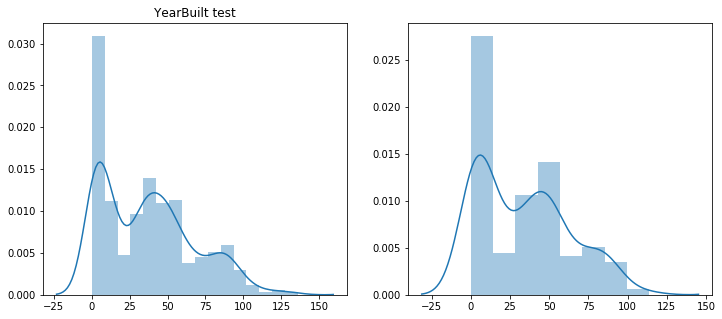

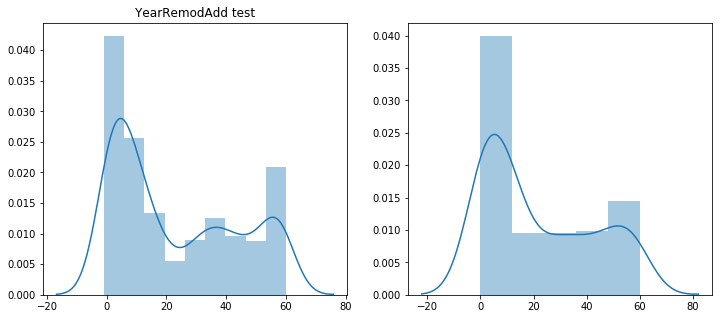

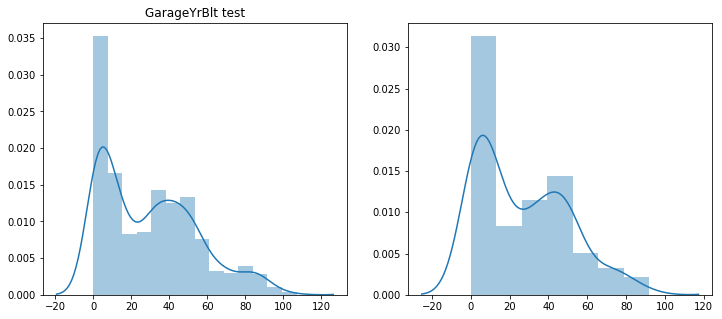

In [11]:
# year variables
year_cols = [col for col in data.columns if 'Yr' in col or 'Year' in col]

for col in year_cols:
    if col == 'YrSold':
        continue
    try:
        fig, ax = plt.subplots(1, 2, figsize=(12,5))
        sns.distplot((X_train['YrSold'] - X_train[col]).dropna(), ax=ax[0])
        ax[0].set_title(f"{col} train")
        sns.distplot((X_test['YrSold'] - X_test[col]).dropna(), ax=ax[1])
        ax[0].set_title(f"{col} test")        
        plt.show()
    except Exception as e:
        print(e)

cannot convert float NaN to integer


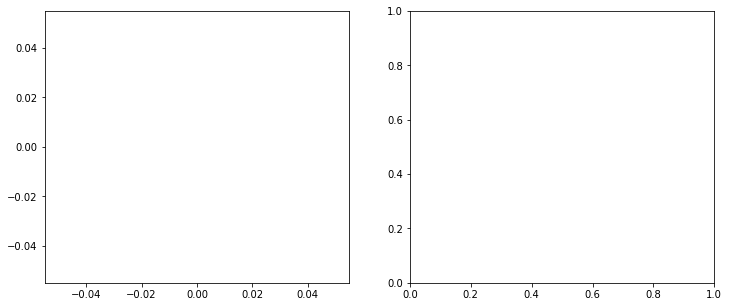

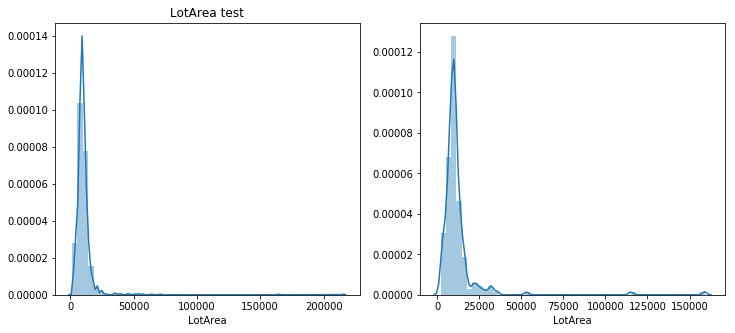

cannot convert float NaN to integer


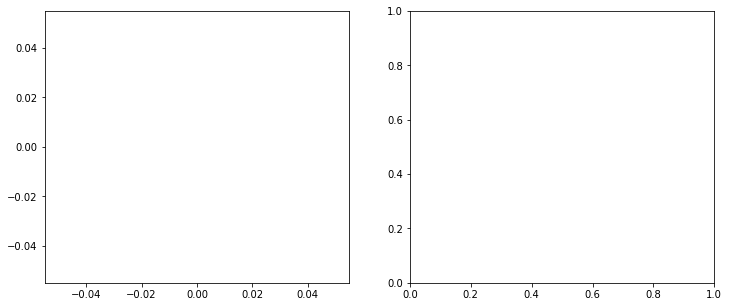

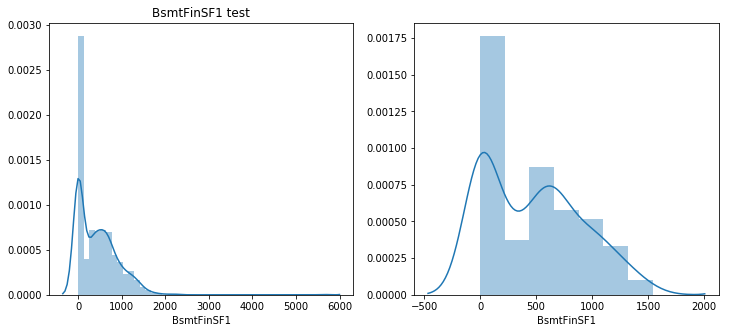

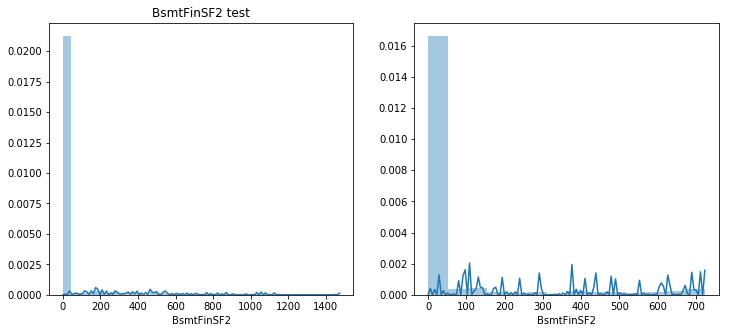

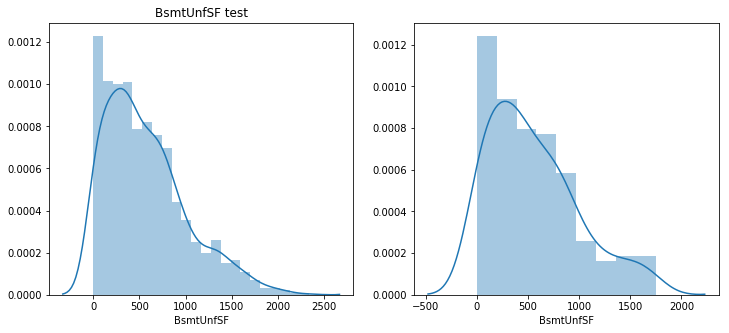

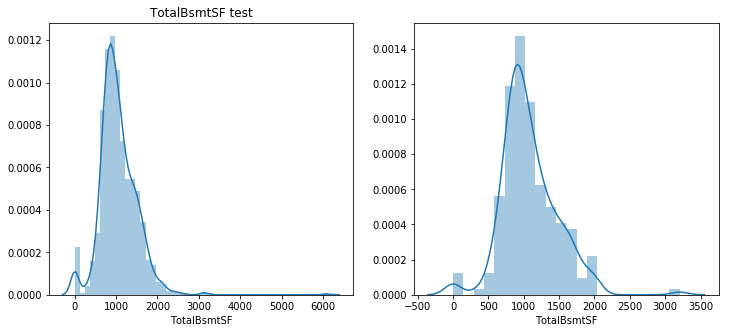

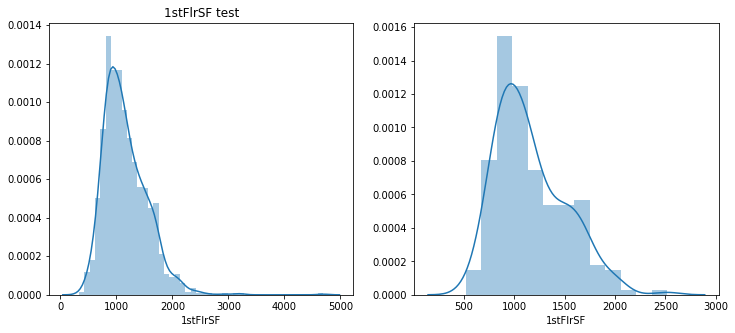

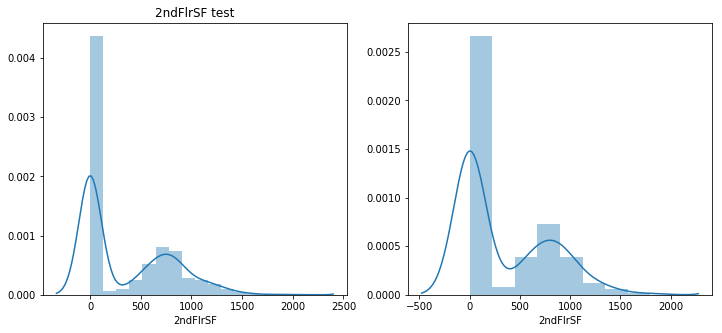

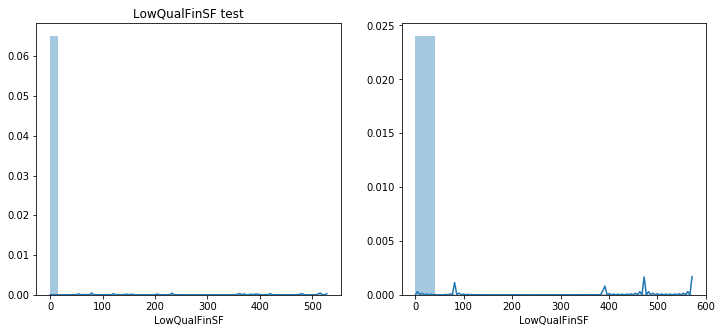

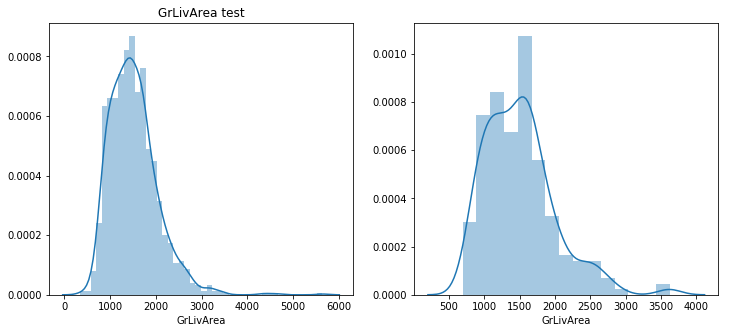

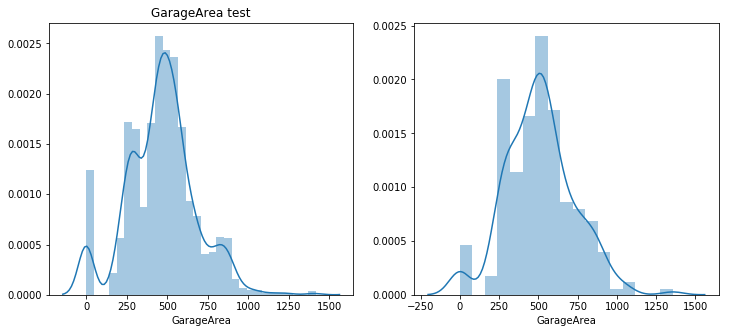

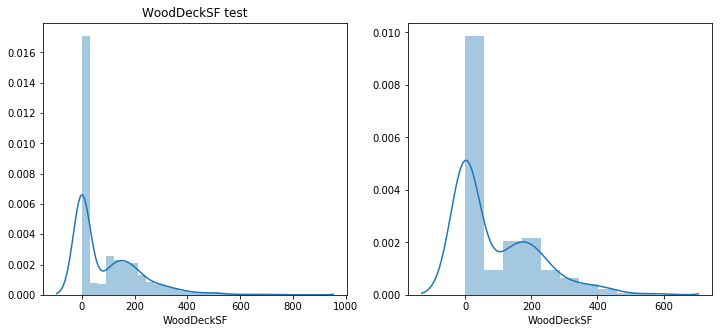

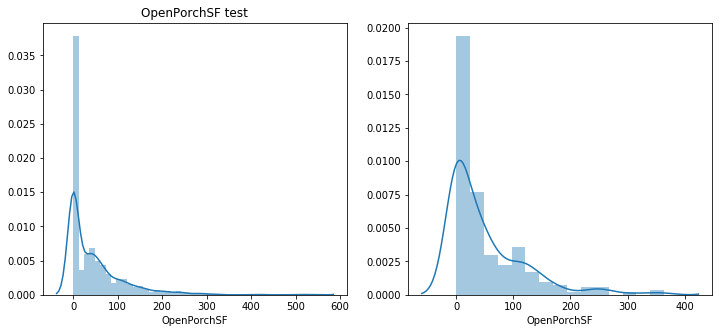

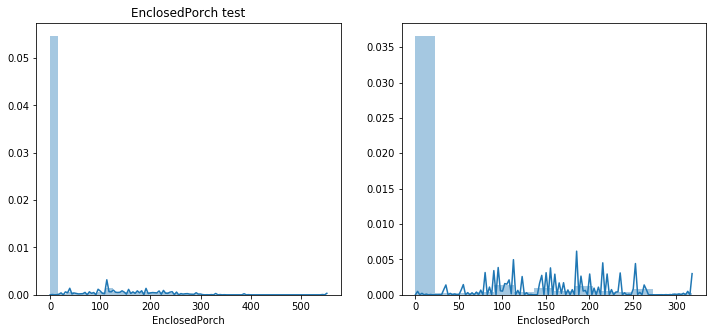

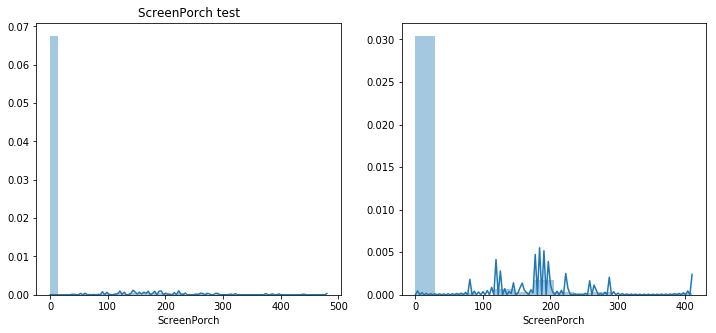

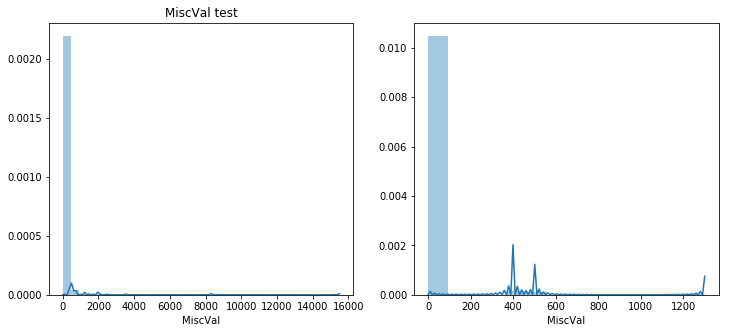

In [12]:
# explore continuous variables
cont_vars = data.select_dtypes(include=['float', 'int']).columns.tolist()

# assume that columns having more than 20 unique integer variables are continuous
cont_vars = [col for col in cont_vars if (data[col].nunique() > 20)
             and (col not in ['Id','SalePrice'] + year_cols)
            ]

for cont_var in cont_vars:
    try:
        fig, ax = plt.subplots(1, 2, figsize=(12,5))
        sns.distplot(X_train[cont_var], ax=ax[0])
        ax[0].set_title(f"{cont_var} train")
        sns.distplot(X_test[cont_var], ax=ax[1])
        ax[0].set_title(f"{cont_var} test")        
        plt.show()
    except Exception as e:
        print(e)

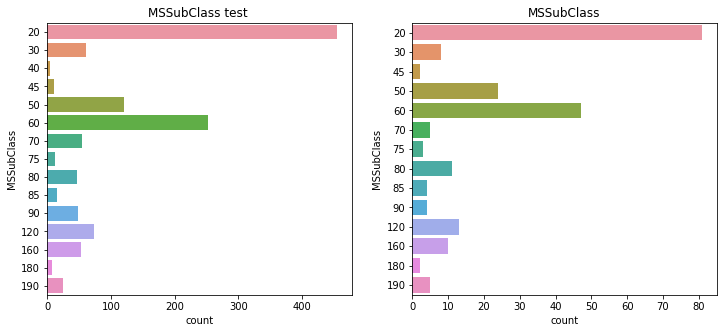

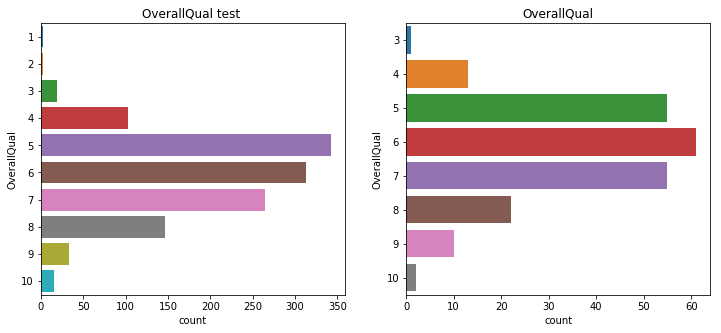

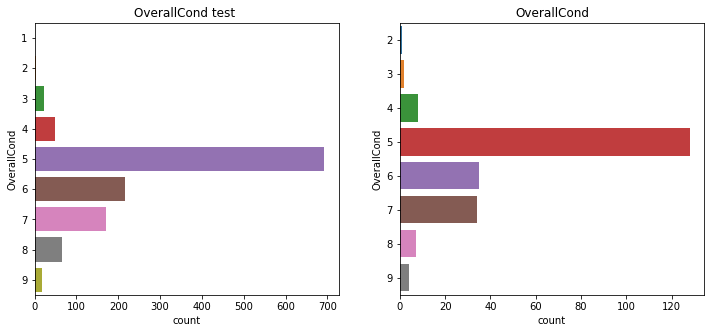

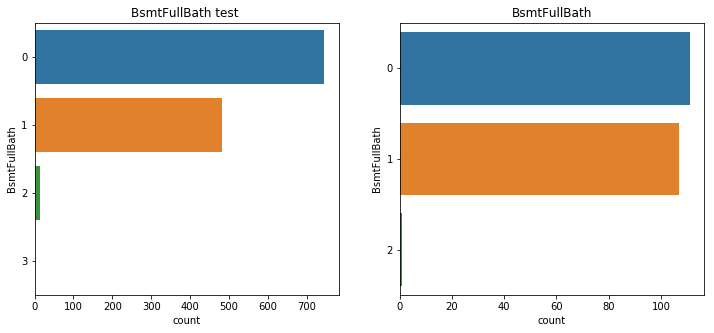

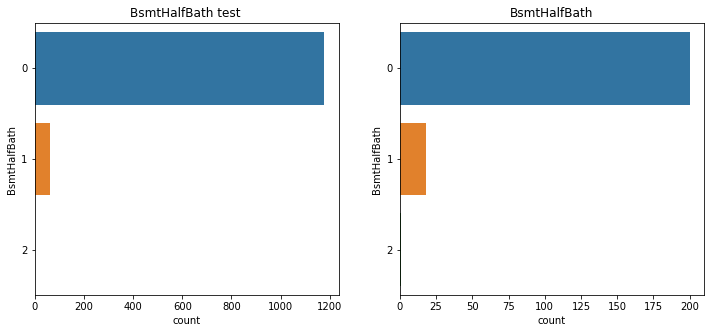

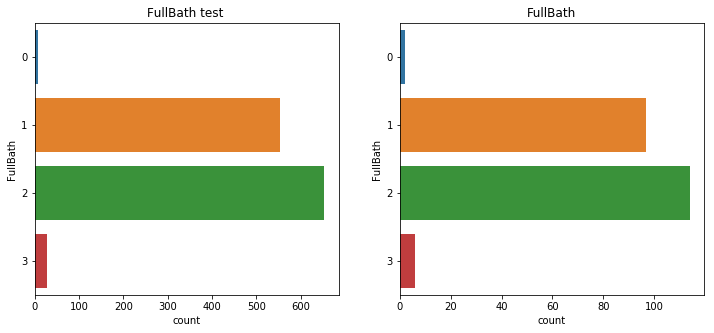

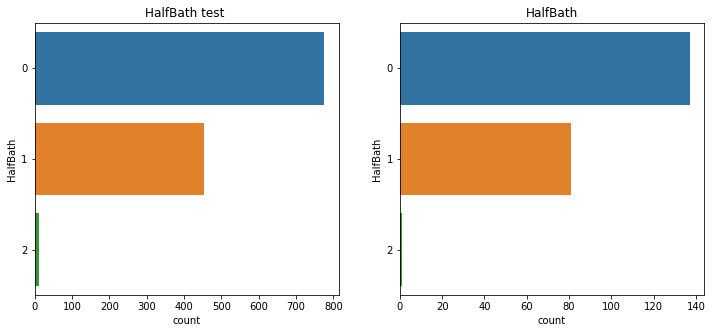

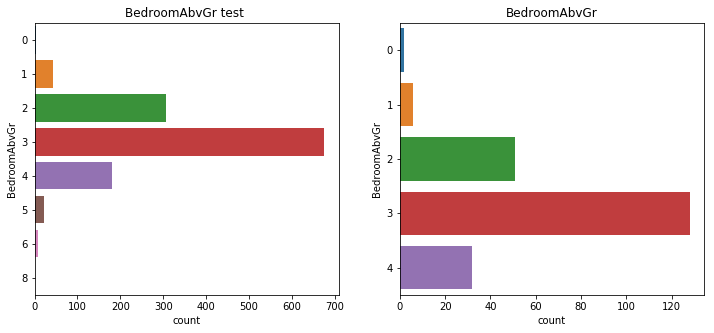

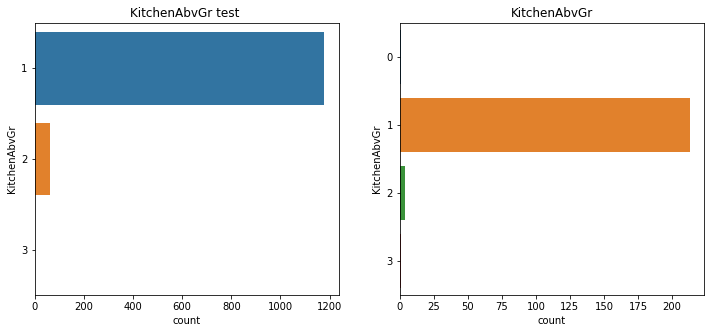

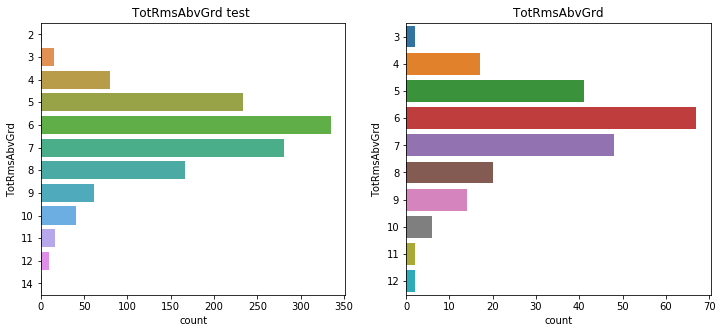

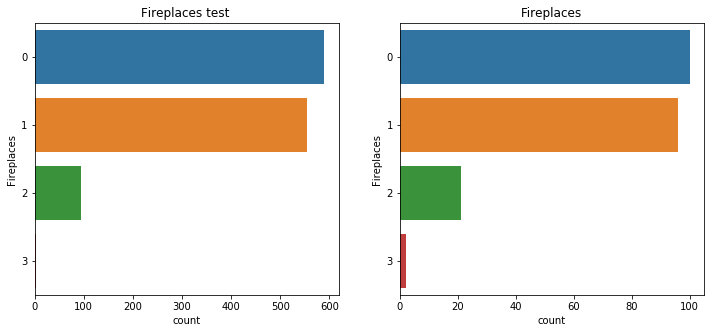

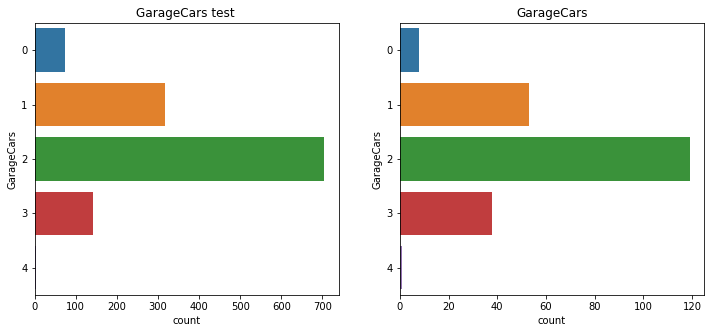

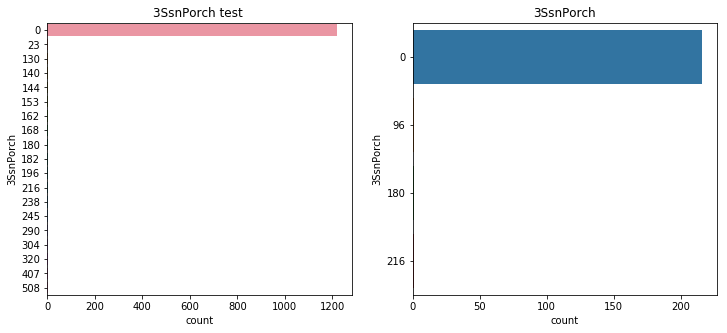

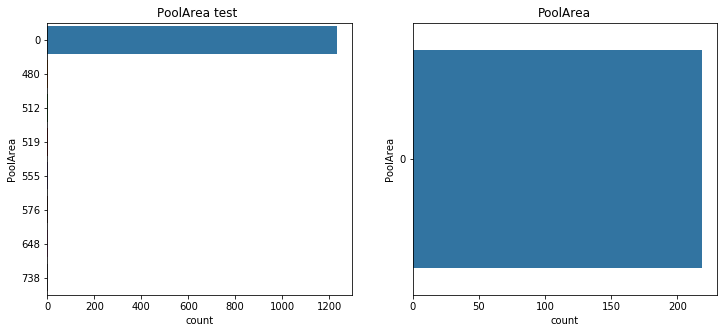

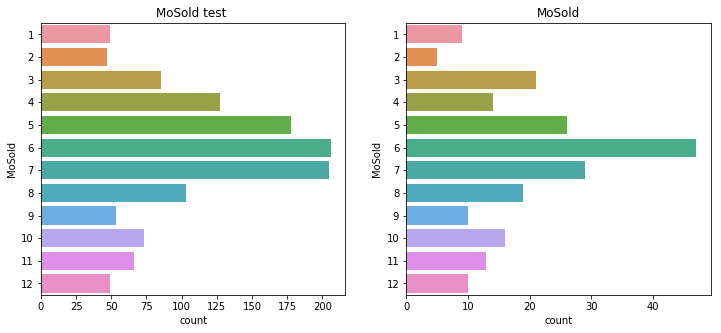

In [13]:
# categorical integer variables
cat_int_vars = data.select_dtypes(include=['int']).columns
cat_int_vars = [col for col in cat_int_vars if (col not in cont_vars + year_cols + ['Id', 'SalePrice'])]

for cat_int_var in cat_int_vars:
    try:
        fig, ax = plt.subplots(1,2, figsize=(12,5))
        sns.countplot(y=X_train[cat_int_var], ax=ax[0])
        ax[0].set_title(f"{cat_int_var} train ")
        sns.countplot(y=X_test[cat_int_var], ax=ax[1])
        ax[0].set_title(f"{cat_int_var} test ")
        plt.title(cat_int_var)
        plt.show()
    except Exception as e:
        print(e)

### 3. Dealing with Missing Values

How many missing values?

In [14]:
def summarize_missingness(df):
    '''
    Utility function to summarize missing values
    '''
    nulls = df.isnull()
    counts = nulls.sum()
    percs = nulls.mean().mul(100.)
    
    nulls_df = pd.DataFrame({'Count of missing values': counts, 'Percentage of missing values': percs}, 
                            index=counts.index)
    
    display(nulls_df)

In [15]:
# flag variables with missing values
vars_with_na = [col for col in X_train.columns if X_train[col].isnull().sum() > 0]

for dataframe in [X_train, X_test]:
    summarize_missingness(dataframe[vars_with_na])

,Count of missing values,Percentage of missing values
LotFrontage,207,16.680097
Alley,1163,93.714746
MasVnrType,6,0.483481
MasVnrArea,6,0.483481
BsmtQual,33,2.659146
BsmtCond,33,2.659146
BsmtExposure,34,2.739726
BsmtFinType1,33,2.659146
BsmtFinType2,33,2.659146
Electrical,1,0.080580


,Count of missing values,Percentage of missing values
LotFrontage,52,23.744292
Alley,206,94.063927
MasVnrType,2,0.913242
MasVnrArea,2,0.913242
BsmtQual,4,1.826484
BsmtCond,4,1.826484
BsmtExposure,4,1.826484
BsmtFinType1,4,1.826484
BsmtFinType2,5,2.283105
Electrical,0,0.000000


Let's drop columns where the percentage of missingness is greater than 90%.

In [16]:
to_drop = []

for var in vars_with_na:
    if X_train[var].isnull().mean() > 0.9:
        to_drop.append(var)
        
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)

vars_with_na = [var_with_na for var_with_na in vars_with_na if var_with_na not in to_drop]
cat_vars = [col for col in cat_vars + cat_int_vars if col not in to_drop]
num_vars = [col for col in cont_vars + year_cols if col not in to_drop]

summarize_missingness(X_train[vars_with_na])
summarize_missingness(X_test[vars_with_na])

,Count of missing values,Percentage of missing values
LotFrontage,207,16.680097
MasVnrType,6,0.483481
MasVnrArea,6,0.483481
BsmtQual,33,2.659146
BsmtCond,33,2.659146
BsmtExposure,34,2.739726
BsmtFinType1,33,2.659146
BsmtFinType2,33,2.659146
Electrical,1,0.080580
FireplaceQu,590,47.542305


,Count of missing values,Percentage of missing values
LotFrontage,52,23.744292
MasVnrType,2,0.913242
MasVnrArea,2,0.913242
BsmtQual,4,1.826484
BsmtCond,4,1.826484
BsmtExposure,4,1.826484
BsmtFinType1,4,1.826484
BsmtFinType2,5,2.283105
Electrical,0,0.000000
FireplaceQu,100,45.662100


In [17]:
# deal with missing values in categorical columns
cat_vars_with_na = [col for col in vars_with_na if col in cat_vars]

# fill these with 'Missing'
def fill_cat_na(X, var_list):
    df = X.copy()
    for var in var_list:
        if df[var].dtypes == "object":
            # handle objects
            df[var] = X[var].fillna('Missing')
        else:
            # handle integers
            df[var] =  X[var].fillna(-999)
    return df

# Perform imputation and assert there are no missing vals left
X_train = fill_cat_na(X_train, cat_vars_with_na)
assert X_train[cat_vars_with_na].isnull().sum().sum() == 0
summarize_missingness(X_train[cat_vars_with_na])

X_test = fill_cat_na(X_test, cat_vars_with_na)
assert X_test[cat_vars_with_na].isnull().sum().sum() == 0
summarize_missingness(X_test[cat_vars_with_na])

,Count of missing values,Percentage of missing values
MasVnrType,0,0.0
BsmtQual,0,0.0
BsmtCond,0,0.0
BsmtExposure,0,0.0
BsmtFinType1,0,0.0
BsmtFinType2,0,0.0
Electrical,0,0.0
FireplaceQu,0,0.0
GarageType,0,0.0
GarageFinish,0,0.0


,Count of missing values,Percentage of missing values
MasVnrType,0,0.0
BsmtQual,0,0.0
BsmtCond,0,0.0
BsmtExposure,0,0.0
BsmtFinType1,0,0.0
BsmtFinType2,0,0.0
Electrical,0,0.0
FireplaceQu,0,0.0
GarageType,0,0.0
GarageFinish,0,0.0


In [18]:
# deal with missing values in numerical columns
num_vars_with_na = [col for col in vars_with_na if col in num_vars]

# impute by replacing with mode and flagging the missing value
def fill_num_na(X_train, X_test, var_list):
    for var in var_list:
        # determine mode
        mode_val = X_train[var].mode()[0]
        
        # impute training and flag
        X_train[var + '_na'] = np.where(X_train[var].isnull(), 1,0)
        X_train[var].fillna(mode_val, inplace=True)
        
        # impute test and flag
        X_test[var + '_na'] = np.where(X_test[var].isnull(), 1,0)
        X_test[var].fillna(mode_val, inplace=True)
    
    # make sure there are no missing value left
    for frame in [X_train, X_test]:
        assert frame[var_list].isnull().sum().sum() == 0
        
    return X_train, X_test

X_train, X_test = fill_num_na(X_train, X_test, num_vars_with_na)

summarize_missingness(X_train[vars_with_na])
summarize_missingness(X_test[vars_with_na])

,Count of missing values,Percentage of missing values
LotFrontage,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
BsmtQual,0,0.0
BsmtCond,0,0.0
BsmtExposure,0,0.0
BsmtFinType1,0,0.0
BsmtFinType2,0,0.0
Electrical,0,0.0
FireplaceQu,0,0.0


,Count of missing values,Percentage of missing values
LotFrontage,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
BsmtQual,0,0.0
BsmtCond,0,0.0
BsmtExposure,0,0.0
BsmtFinType1,0,0.0
BsmtFinType2,0,0.0
Electrical,0,0.0
FireplaceQu,0,0.0


In [19]:
# assert that all missing values were handled in train and test
assert X_train.isnull().sum().sum() == 0
assert X_test.isnull().sum().sum() == 0

### 4. More EDA

#### Effect of year on SalePrice

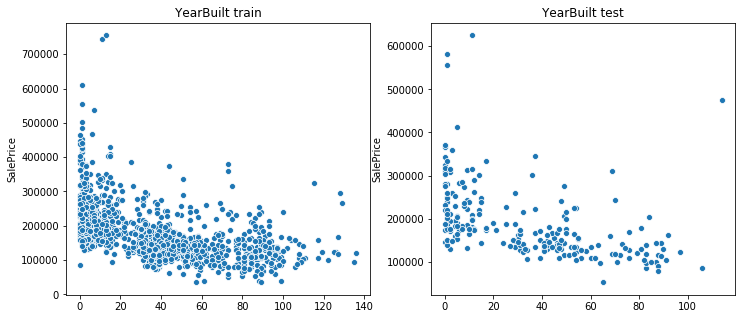

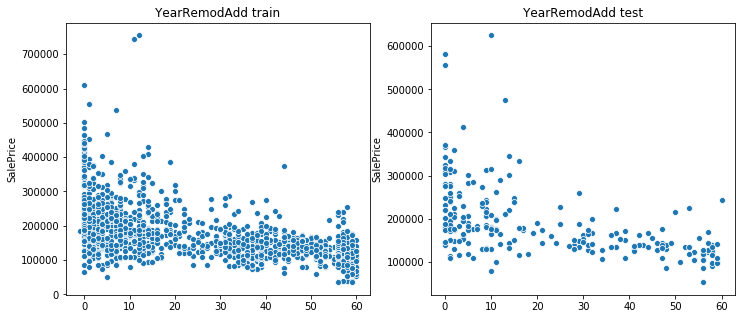

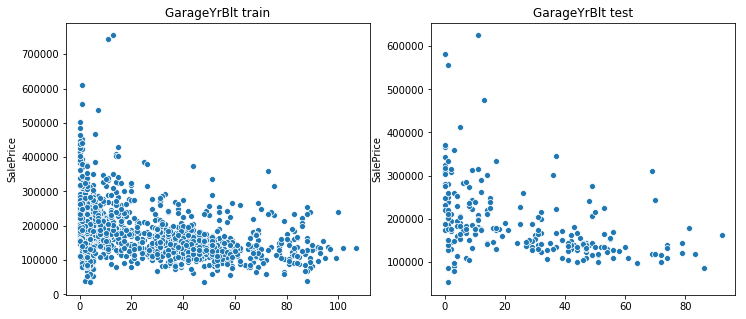

In [20]:
for year_col in year_cols:
    if year_col == 'YrSold':
        continue    
    try:
        fig, ax = plt.subplots(1, 2, figsize=(12,5))
        sns.scatterplot(x=(X_train['YrSold'] - X_train[year_col]), y=np.exp(y_train), ax=ax[0])
        ax[0].set_title(year_col + " train")
        sns.scatterplot(x=(X_test['YrSold'] - X_test[year_col]), y=np.exp(y_test), ax=ax[1])
        ax[1].set_title(year_col + " test")        
        plt.show()
    except Exception as e:
        print(e)

The Sale Price drops with time relatively to the year sold.

### Influence of Categorical Features on SalePrice

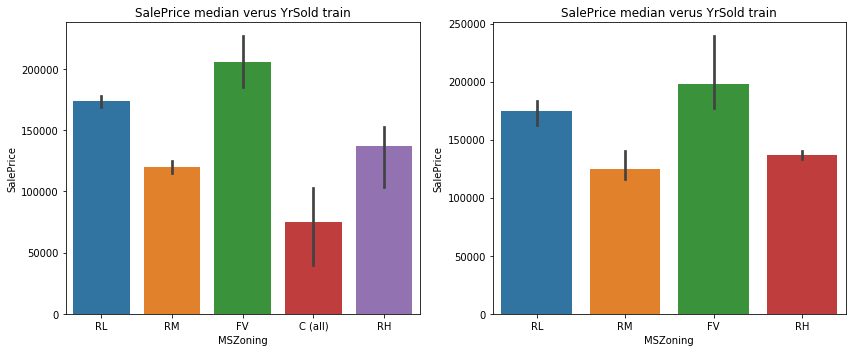

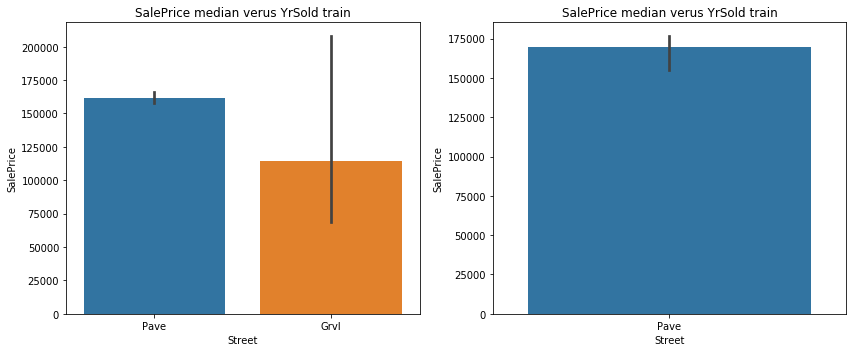

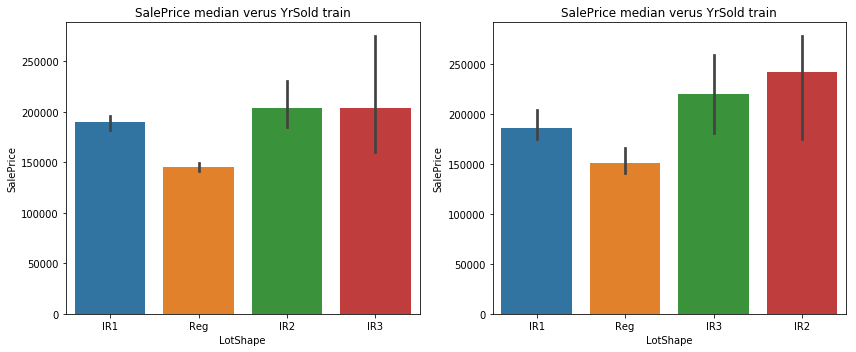

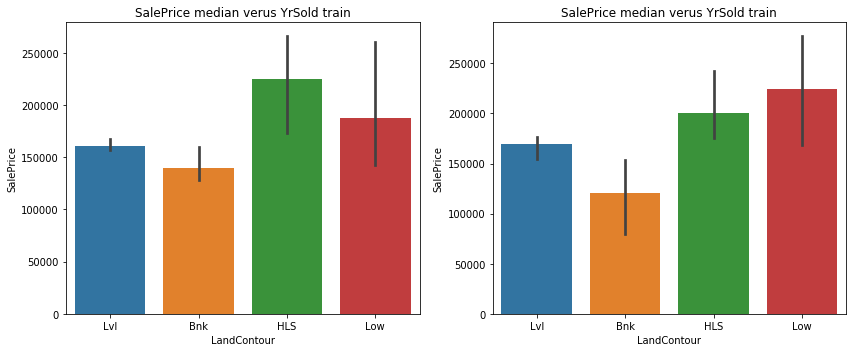

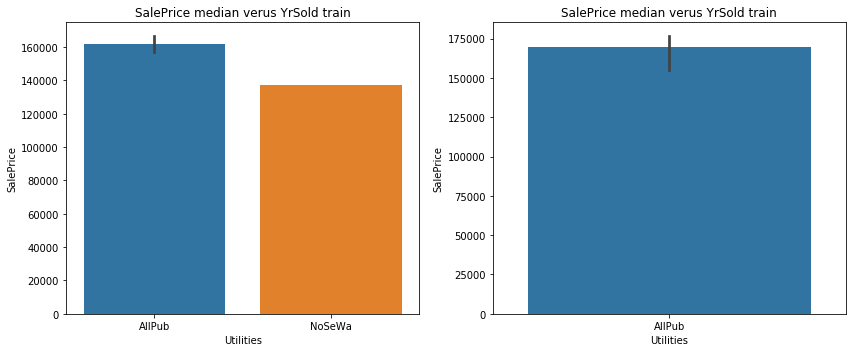

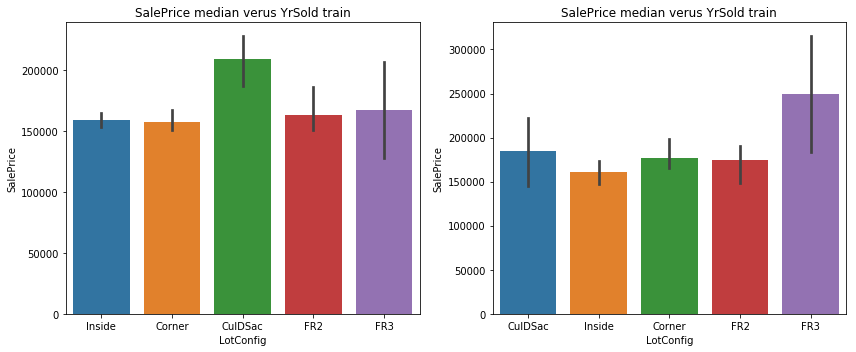

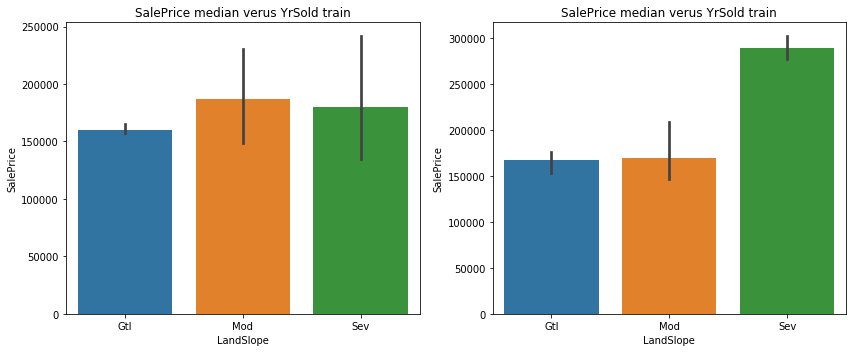

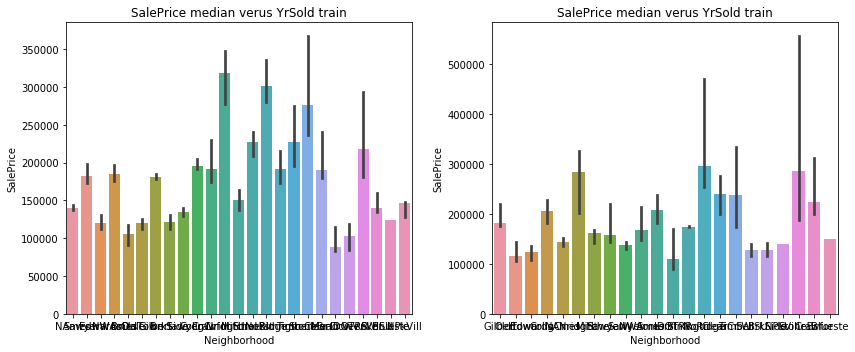

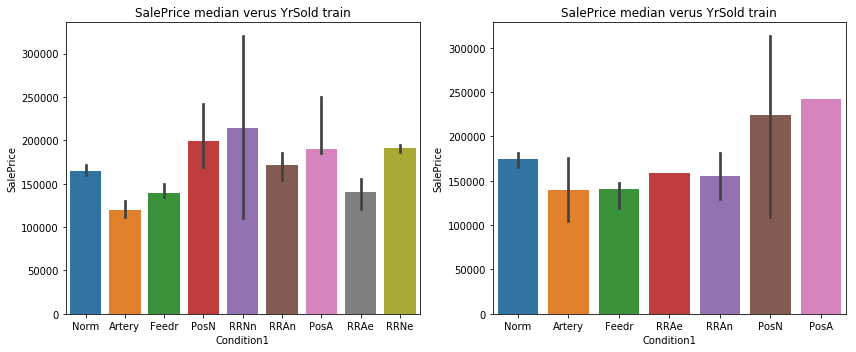

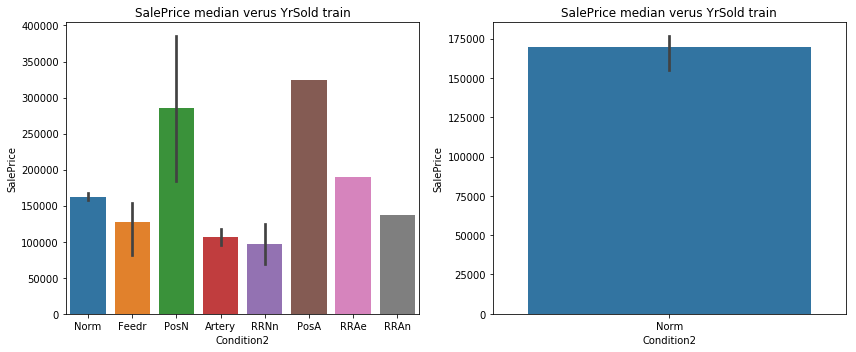

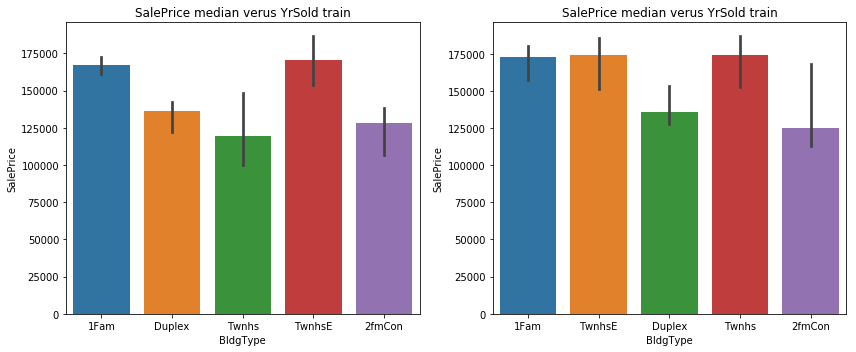

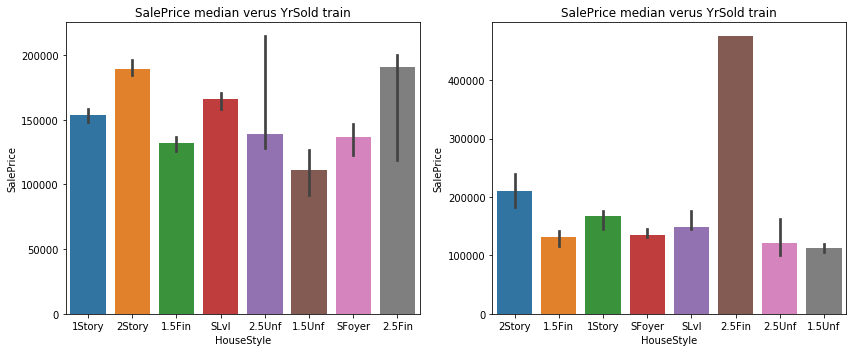

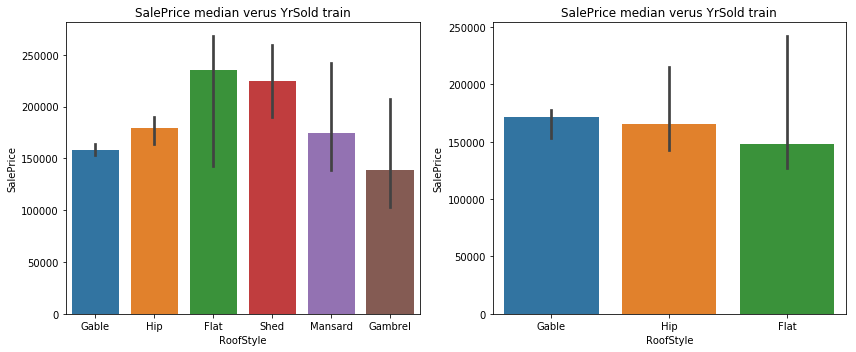

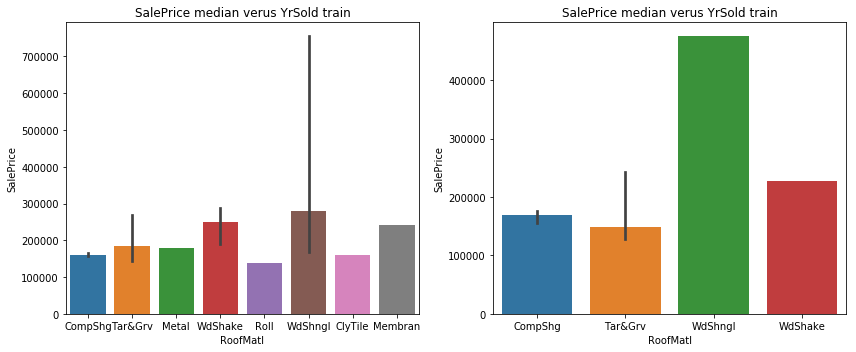

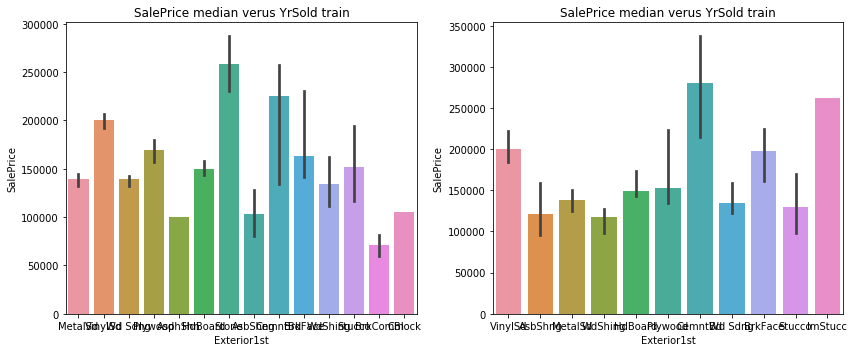

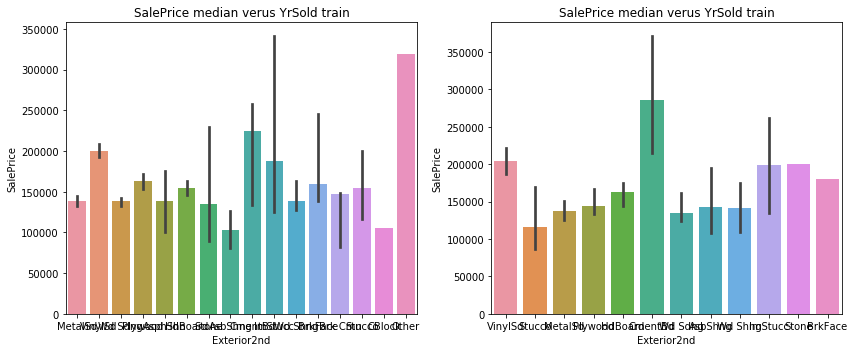

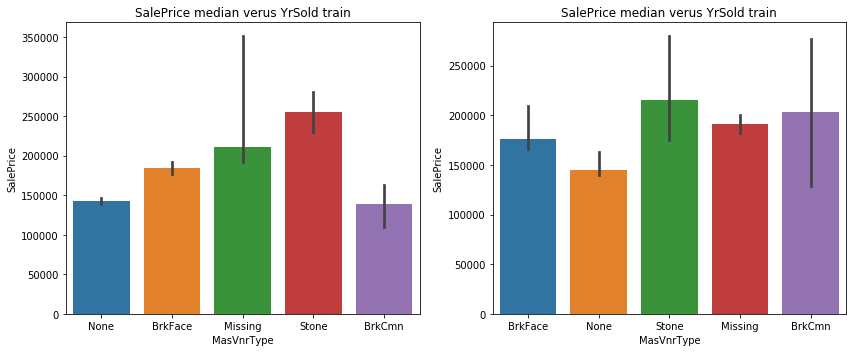

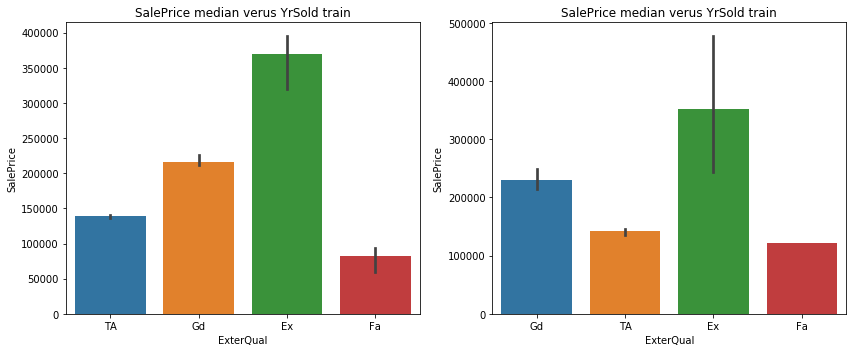

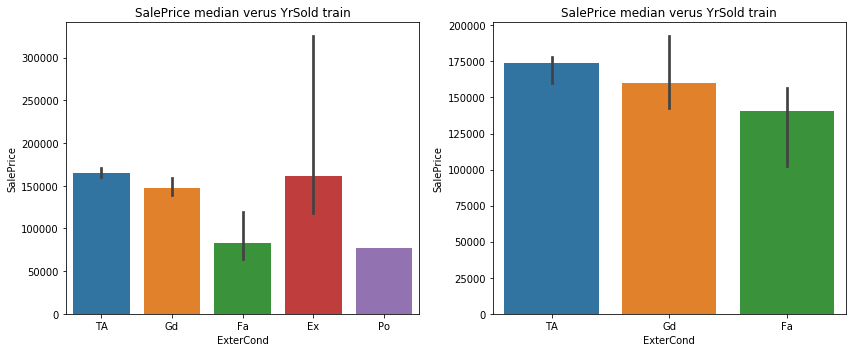

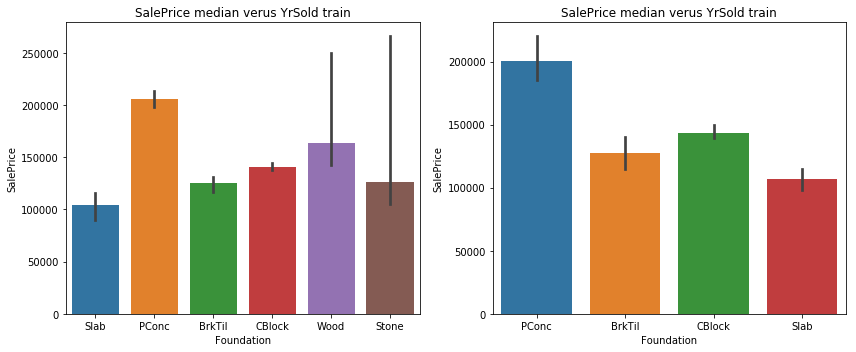

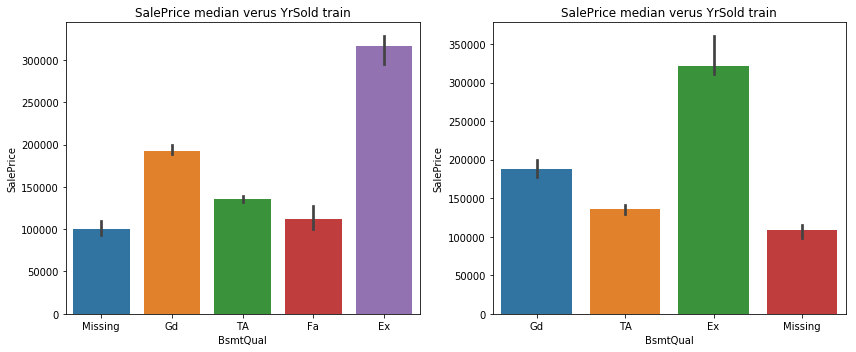

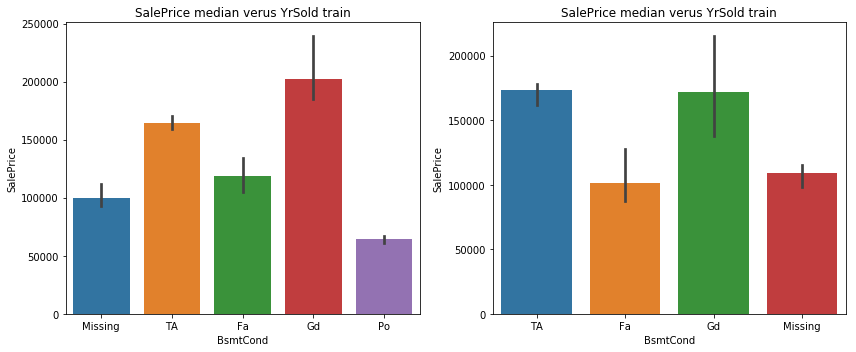

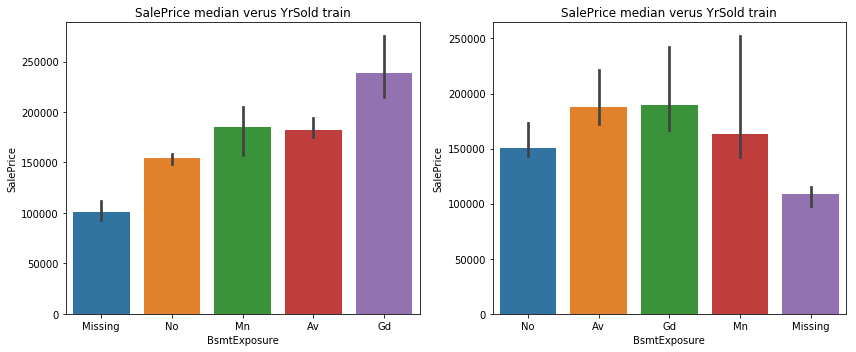

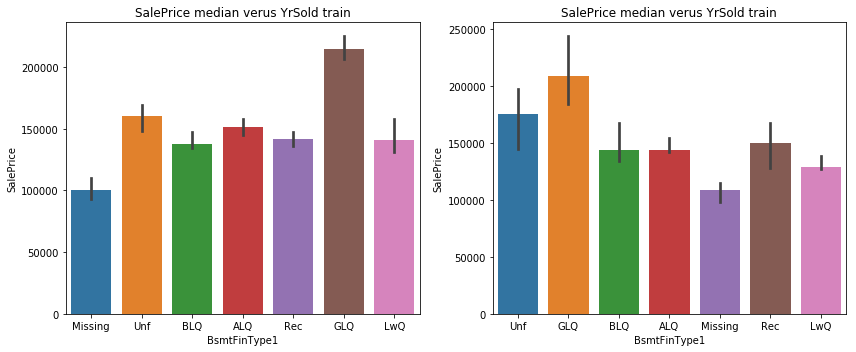

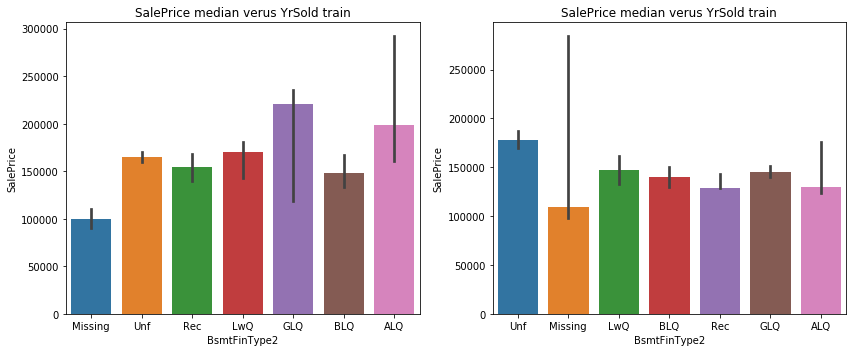

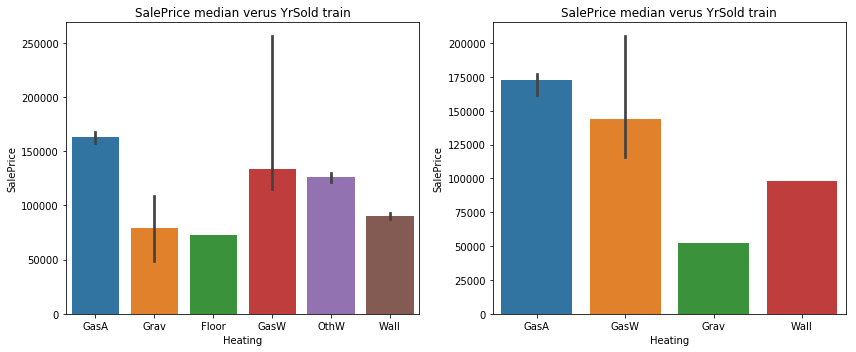

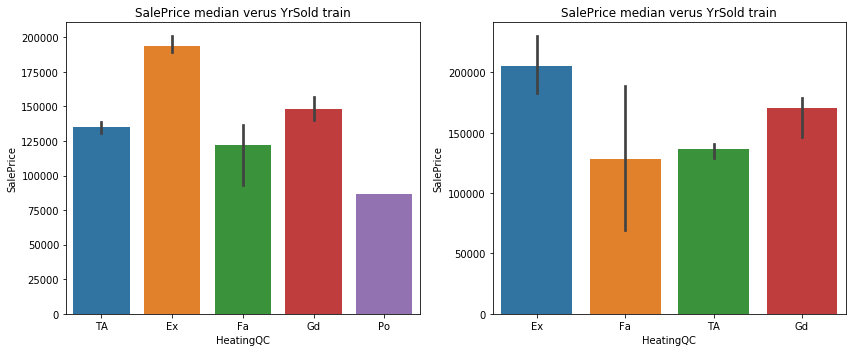

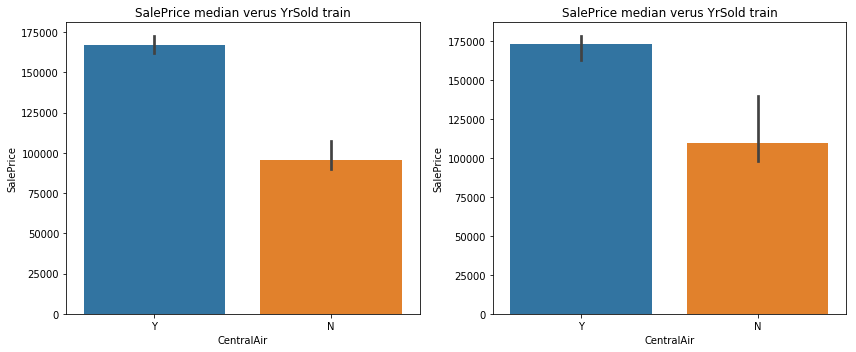

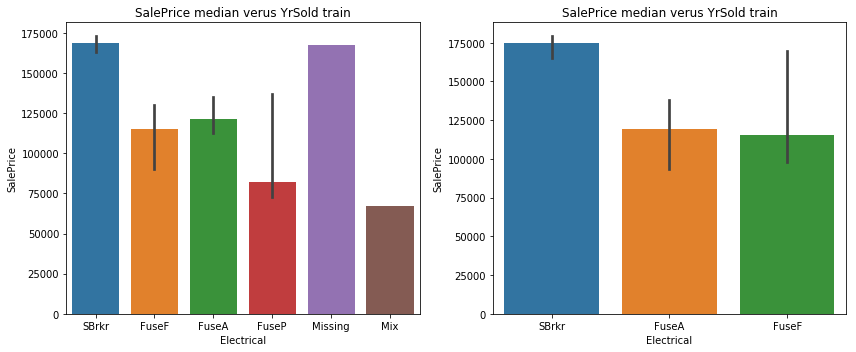

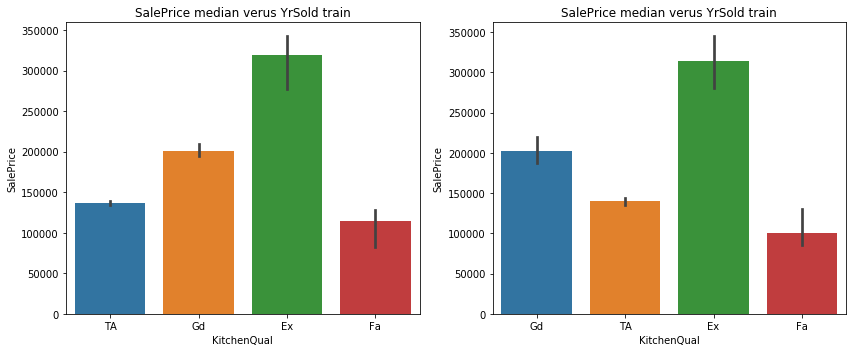

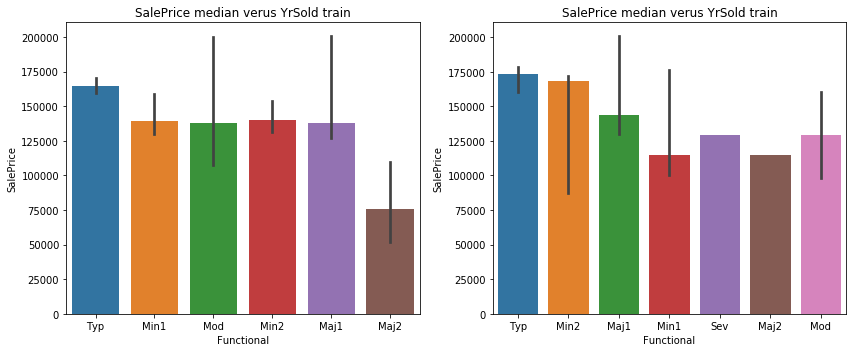

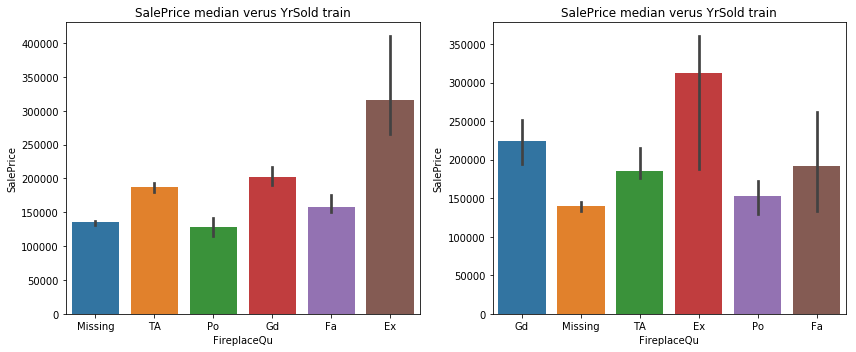

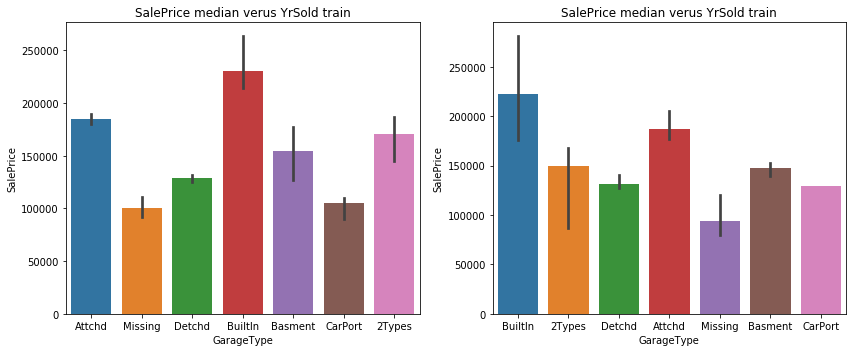

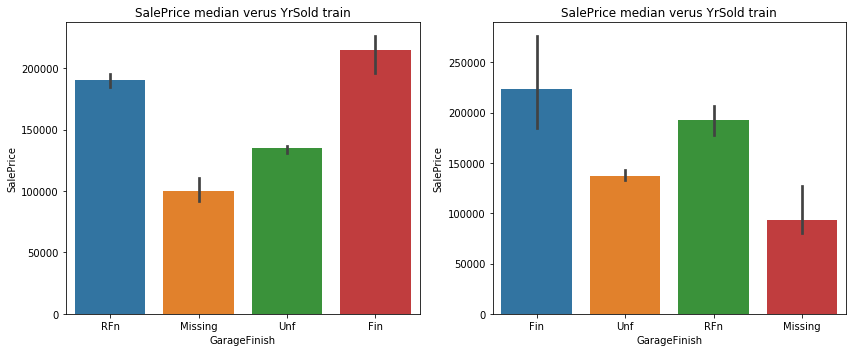

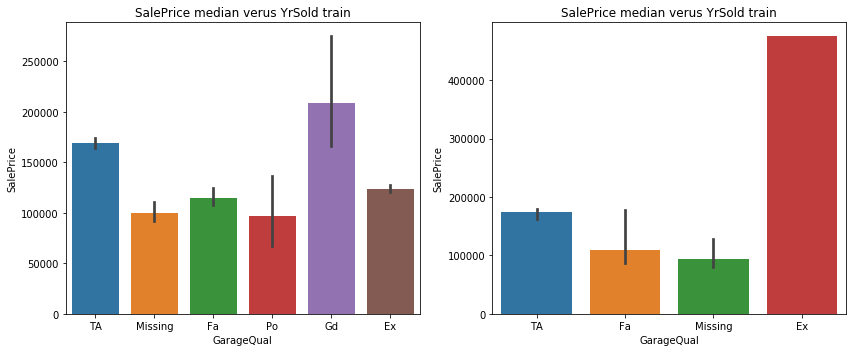

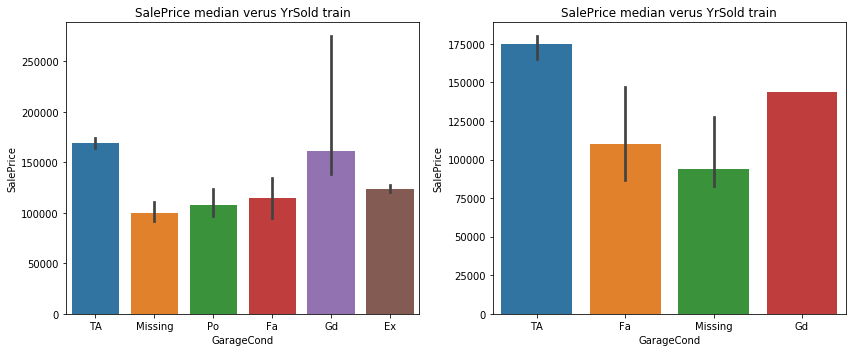

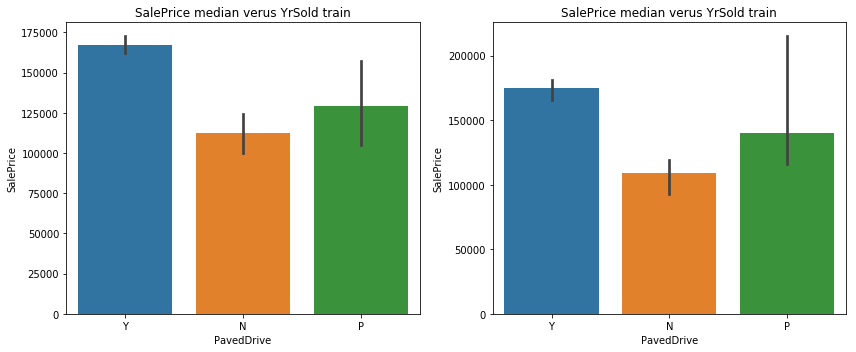

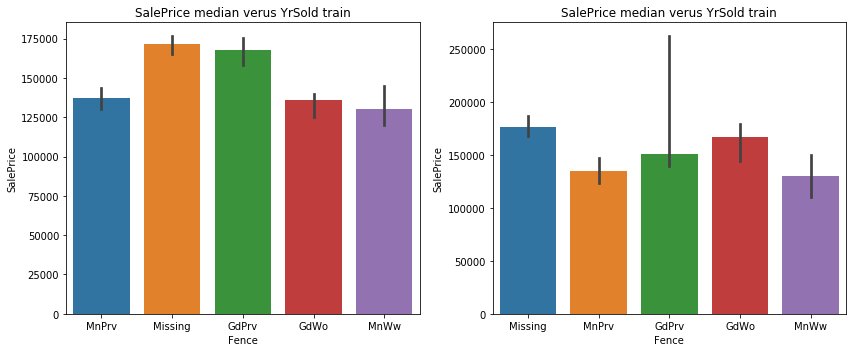

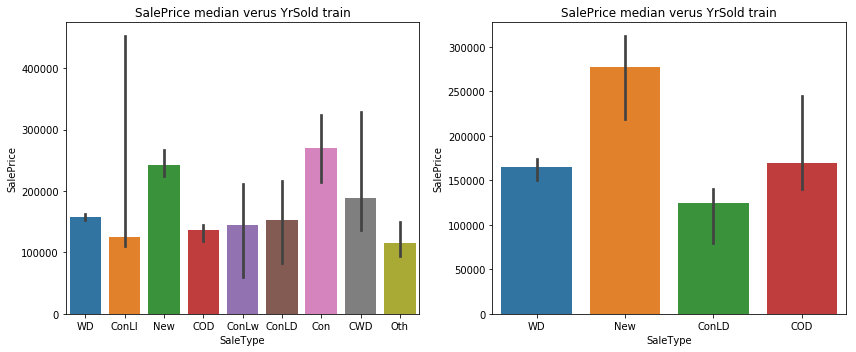

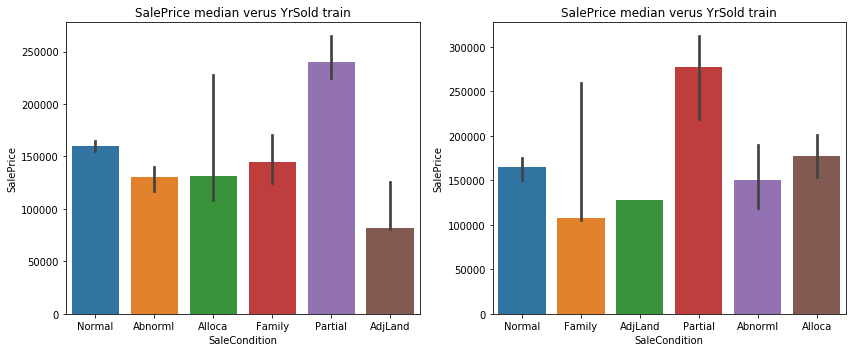

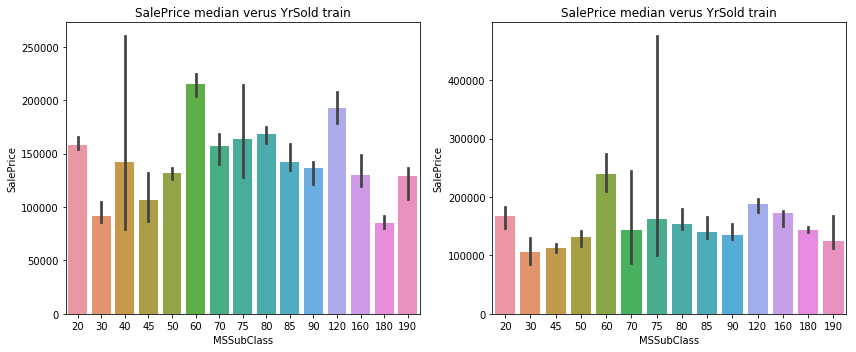

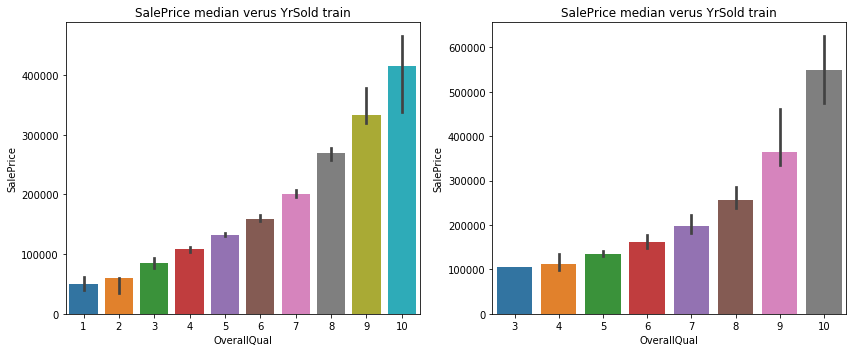

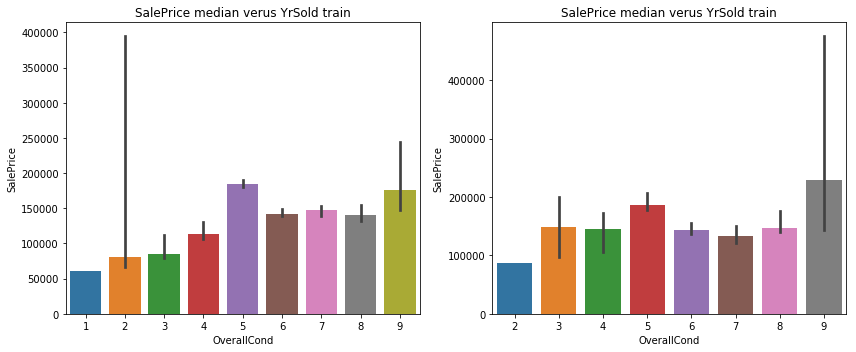

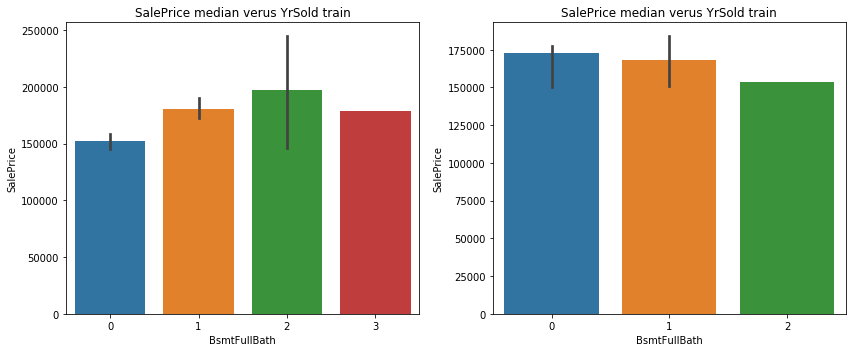

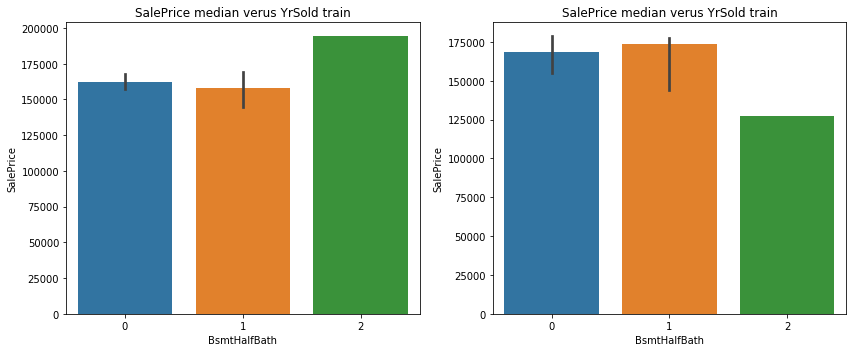

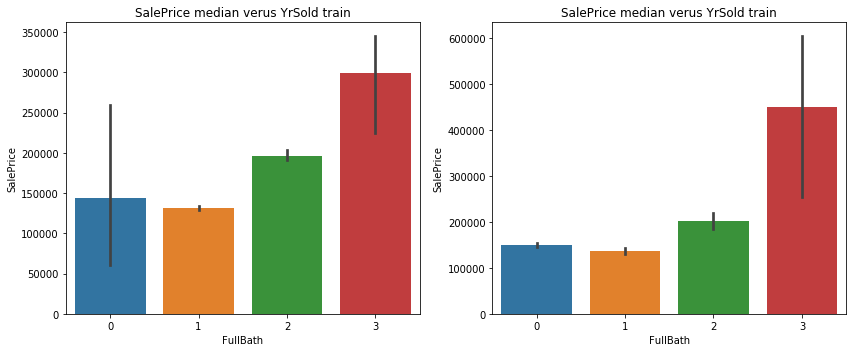

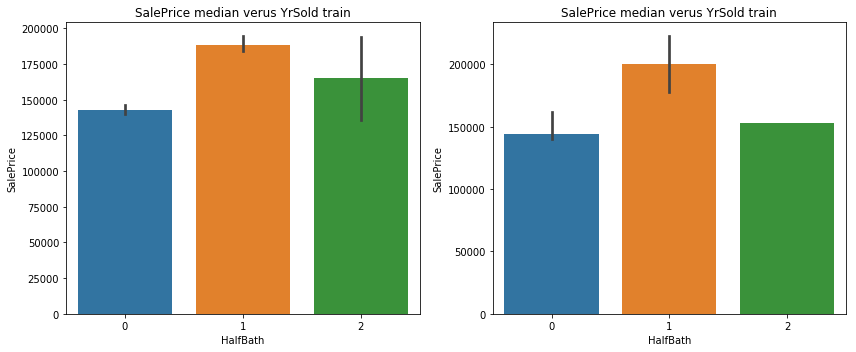

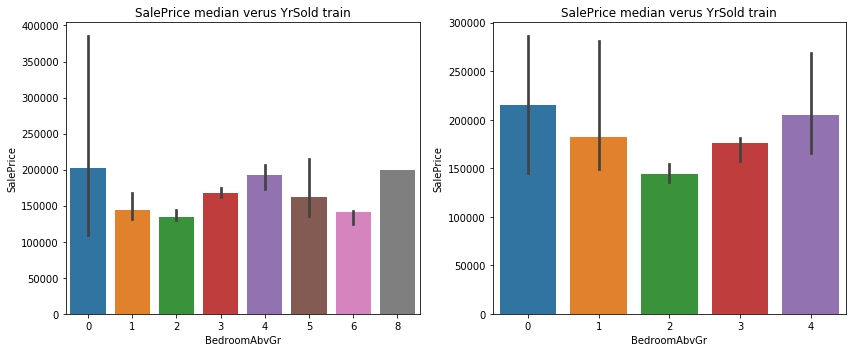

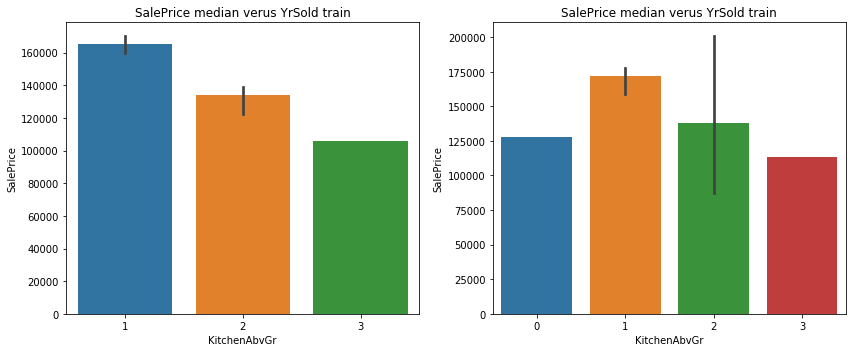

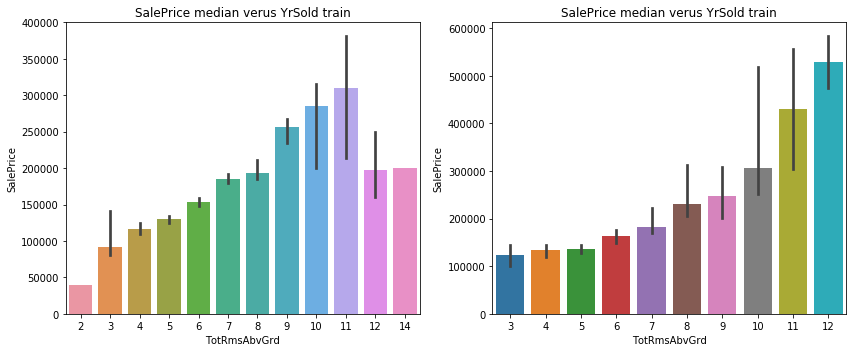

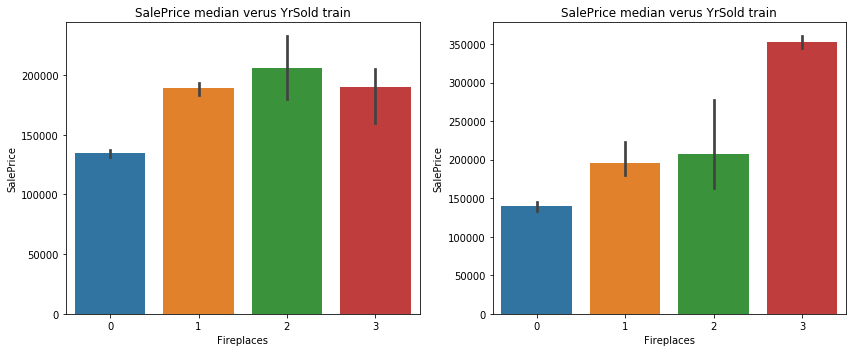

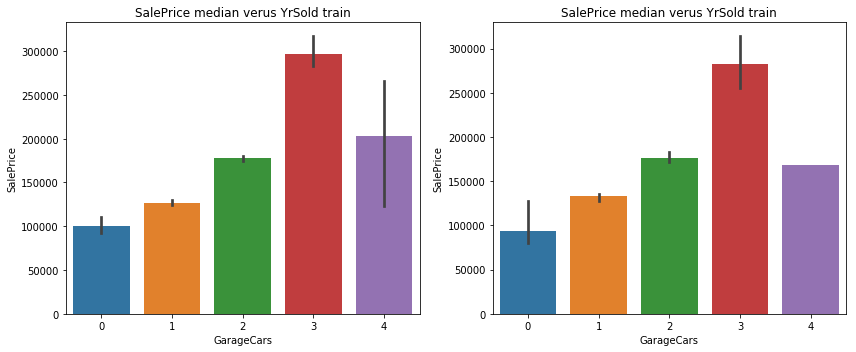

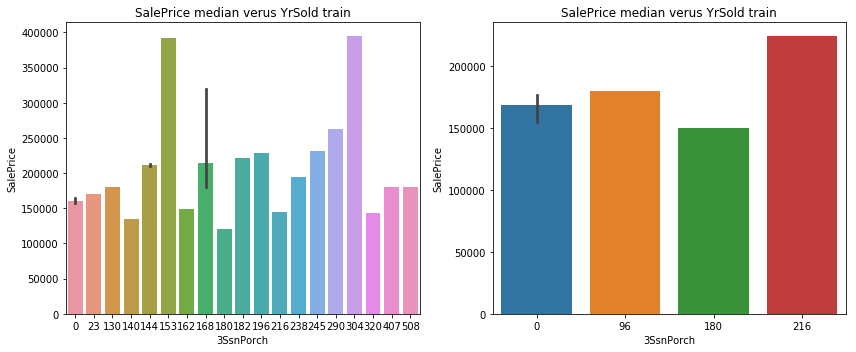

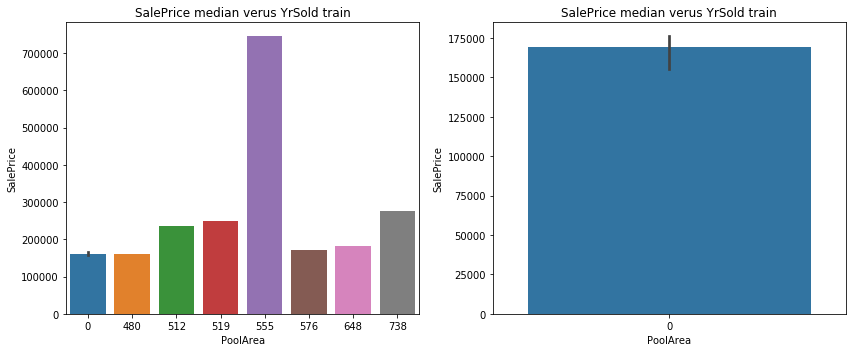

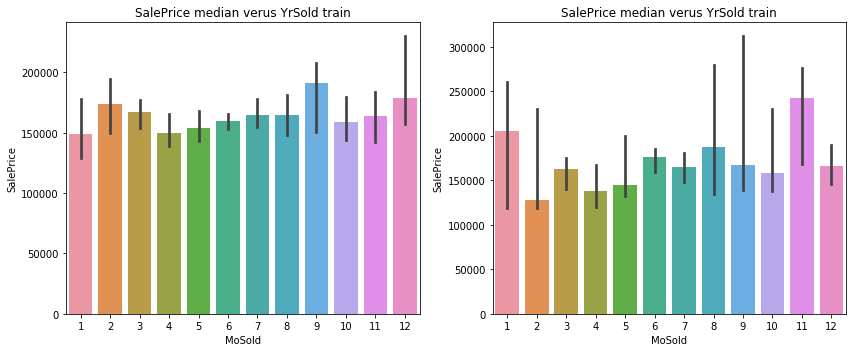

In [21]:
for cat_col in cat_vars:
    try:
        fig, ax = plt.subplots(1,2, figsize=(12,5))
        sns.barplot(x=X_train[cat_col], y=np.exp(y_train), estimator=np.median, ax=ax[0])
        ax[0].set_title(f"SalePrice median verus {col} train")
        sns.barplot(x=X_test[cat_col], y=np.exp(y_test), estimator=np.median, ax=ax[1])
        ax[1].set_title(f"SalePrice median verus {col} train")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(e)

## 5. Feature Engineering

### Engineering time features

In [22]:
def engineer_time_features(X_train, X_test, year_cols, ref_year='YrSold'):
    '''
    Utility function to engineer time features
    '''
    for col in year_cols:
        if col != ref_year:
            X_train[col] = X_train[ref_year] - X_train[col]
            X_test[col] = X_test[ref_year] - X_test[col]
            
    X_train.drop(columns=ref_year, inplace=True)
    X_test.drop(columns=ref_year, inplace=True)
    
    return X_train, X_test

X_train, X_test = engineer_time_features(X_train, X_test, year_cols, ref_year='YrSold')
num_vars = [num_var for num_var in num_vars if num_var != 'YrSold']

### Engineering rare categories

In [23]:
def engineer_rare_cat_vars(X_train, X_test, cat_vars, min_perc=0.03):
    '''
    Utility function to engineer rare categories.
    
    Removes categorical features with 1 category.
    
    Returns list of categorical variables also after removing features with 1 category.
    '''
    to_drop = []
    
    for col in cat_vars:
        if X_train[col].dtypes == 'object':
            # Find percentage of categories
            percs = X_train[col].value_counts(normalize=True)
            
            # rare categories are the ones having a % smaller than min_perc
            rare_categories = percs[percs < min_perc].index
            
            # Replace these with "Rare"
            X_train.loc[X_train[col].isin(rare_categories), col] = "Rare"
            X_test.loc[X_test[col].isin(rare_categories), col] = "Rare"
            
            logging.info(f"Engineered categories for {col}")
        
        # Remove features with one category only
        if X_train[col].nunique() < 2:
            to_drop.append(col)
    
    # drop columns containing one category if they exist
    if to_drop:
        X_train.drop(columns=to_drop, inplace=True)
        X_test.drop(columns=to_drop, inplace=True)
        cat_vars = list(set(cat_vars).difference(to_drop))
    

    return X_train, X_test, cat_vars, cat_vars

In [24]:
X_train, X_test, cat_vars, cat_vars = engineer_rare_cat_vars( X_train, X_test, cat_vars)

INFO:root:Engineered categories for MSZoning
INFO:root:Engineered categories for Street
INFO:root:Engineered categories for LotShape
INFO:root:Engineered categories for LandContour
INFO:root:Engineered categories for Utilities
INFO:root:Engineered categories for LotConfig
INFO:root:Engineered categories for LandSlope
INFO:root:Engineered categories for Neighborhood
INFO:root:Engineered categories for Condition1
INFO:root:Engineered categories for Condition2
INFO:root:Engineered categories for BldgType
INFO:root:Engineered categories for HouseStyle
INFO:root:Engineered categories for RoofStyle
INFO:root:Engineered categories for RoofMatl
INFO:root:Engineered categories for Exterior1st
INFO:root:Engineered categories for Exterior2nd
INFO:root:Engineered categories for MasVnrType
INFO:root:Engineered categories for ExterQual
INFO:root:Engineered categories for ExterCond
INFO:root:Engineered categories for Foundation
INFO:root:Engineered categories for BsmtQual
INFO:root:Engineered categor

### Preparing the right format for modeling

Prior to doing any modeling, we should prepare the data in the right format. For categrorical variables, we will do one-hot-encoding and for numerical variables, we'll perform Standrardization. All these operations can be encapsulated in a scikit-learn pipeline later on.

Let's first start by creating a scikit-learn estimator that select particular columns.

In [25]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols):
        if not isinstance(cols, list):
            cols = [cols]
        self.cols = cols
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.cols] 

In [26]:
class Scaler(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols):
        if not isinstance(cols, list):
            cols = [cols]
        self.cols = cols
    
    def fit(self, X, y=None):
        self.sc = {}
        for col in self.cols:
            sc = StandardScaler()
            self.sc[col] = sc.fit(X[col].values.reshape(-1,1))
        return self
    
    def transform(self, X, y=None):
        X_final = X[self.cols].copy(deep=True)
        for col in self.cols:
            X_final[col] = self.sc[col].transform(X_final[col].values.reshape(-1,1))
        X_final.columns = [f"{col}_standardized" for col in X_final.columns]
        self.X = X_final
        return X_final

In [27]:
import random 

class OHE(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols):
        if not isinstance(cols, list):
            cols = [cols]
        self.cols = cols
            
    def fit(self, X, y=None):
        self.classes = {}
        self.le_dict = {}
        self.ohe = {}
        for col in self.cols:
            if X[col].dtypes != 'object': # Skip integer classes
                continue
            le = LabelEncoder()
            ohe = OneHotEncoder(sparse=False)
            X1 =  le.fit_transform(X[col]).reshape(-1,1)
            self.le_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))
            self.classes[col] = [f"{col}_{class_}" for class_ in le.classes_]
            self.ohe[col] =  ohe.fit(X1)

        return self

    
    def transform(self, X, y=None):
        X_final = X[self.cols].copy(deep=True)
        for col in self.cols:
            if X[col].dtypes != 'object':
                continue
            class_choices = list(self.le_dict[col].values())
            X1 = X[col].apply(lambda x: 
                              self.le_dict[col].get(x, random.choice(class_choices))
                              ).values.reshape(-1,1) 
            X_trans = self.ohe[col].transform(X1)
            X_final = X_final.drop(columns=col)
            cur_cols = X_final.columns.tolist()
            X_final = np.concatenate([X_final.values, X_trans], axis=1)
            X_final = pd.DataFrame(X_final, columns = cur_cols + self.classes[col],
                                   index=X.index.tolist())
        return X_final

In [28]:
ohe = OHE(cat_vars)
num_selector = ColumnSelector(num_vars)

X_train_num = num_selector.fit_transform(X_train)
X_test_num = num_selector.transform(X_test)
num_vars = X_train_num.columns.tolist()

X_train_cat = ohe.fit_transform(X_train)
X_test_cat = ohe.transform(X_test)
cat_vars = X_train_cat.columns.tolist()

In [29]:
X_train = pd.concat([X_train_cat, X_train_num], axis=1, ignore_index=False)
X_test = pd.concat([X_test_cat, X_test_num], axis=1, ignore_index=False)

## 6. Feature Selection

In [30]:
feature_selection_pipeline = make_pipeline(
                                        FeatureUnion([
                                            ("Numerical", make_pipeline(ColumnSelector(num_vars),
                                                                        StandardScaler())),
                                            ("Categorical", ColumnSelector(cat_vars))                         
                                             ]),
                                        LassoCV(alphas=[5*10**(-4), 10**(-3), 10**(-2)], n_jobs=-1)
                                        )

In [31]:
feature_selection_pipeline.fit(X_train, y_train)
selector = SelectFromModel(feature_selection_pipeline.named_steps['lassocv'], threshold=10**(-3),
                           prefit=True)

X_train_transf = selector.transform(X_train)
X_test_trans = selector.transform(X_test)

selected_cols = X_train.columns[selector.get_support()]

cat_vars_trans = [col for col in cat_vars if col in selected_cols]
num_vars_trans = [col for col in num_vars if col in selected_cols]

## 7. Model Building & Evaluation

In [32]:
def build_and_evaluate_models(X, y, models_list, preprocessing_pipeline, scoring, cv):
    '''
    Helper function that evaluates a list of sklearn models using k-fold CV.
    
    returns a pandas dataframe of cv negative RMSEs.
    '''
    
    scores = dict()
    best_score, best_model = -float('inf'), None
    
    for model in models_list:
        model_name = model.__class__.__name__
        logging.info(f"Evaluating model {model_name}")
        
        pipe = make_pipeline(preprocessing_pipeline, model)
        cv_scores = cross_val_score(pipe, X, y,                                  
                                     scoring=scoring,
                                     cv=cv,
                                     n_jobs=-1)
        scores[model_name] = cv_scores
        
        cv_mean = cv_scores.mean()
        if cv_mean > best_score:
            best_score = cv_mean
            best_model = pipe
        
        logging.info(f"Done from evaluating model {model_name}")
     
    scores = pd.DataFrame(scores)
    
    # multiply result by -1 and take root to obtain rmse
    scores = np.sqrt(-scores)
    
    return -scores, best_model

In [33]:
# Select all columns
all_columns = num_vars_trans + cat_vars_trans

# Build preprocessing pipeline
preprocessing_pipeline = make_pipeline(
                                        ColumnSelector(all_columns),
                                        FeatureUnion([
                                        ("Numerical", make_pipeline(ColumnSelector(num_vars_trans),
                                                                    StandardScaler())),
                                        ("Categorical", make_pipeline(ColumnSelector(cat_vars_trans)))
                                         ])
                                      )
models = [
            LinearRegression(), 
            SVR(),
            XGBRegressor(random_state=SEED, n_jobs=-1),
            Lasso(random_state=SEED),
            RandomForestRegressor(random_state=SEED, n_jobs=-1)
         ]

N_SPLITS = 5
cv = KFold(n_splits=N_SPLITS, random_state=SEED)

results, best_model = build_and_evaluate_models(X_train, y_train, models_list=models, 
                                                preprocessing_pipeline=preprocessing_pipeline,
                                                scoring='neg_mean_squared_error',
                                                cv=cv)

INFO:root:Evaluating model LinearRegression
INFO:root:Done from evaluating model LinearRegression
INFO:root:Evaluating model SVR
INFO:root:Done from evaluating model SVR
INFO:root:Evaluating model XGBRegressor
INFO:root:Done from evaluating model XGBRegressor
INFO:root:Evaluating model Lasso
INFO:root:Done from evaluating model Lasso
INFO:root:Evaluating model RandomForestRegressor
INFO:root:Done from evaluating model RandomForestRegressor


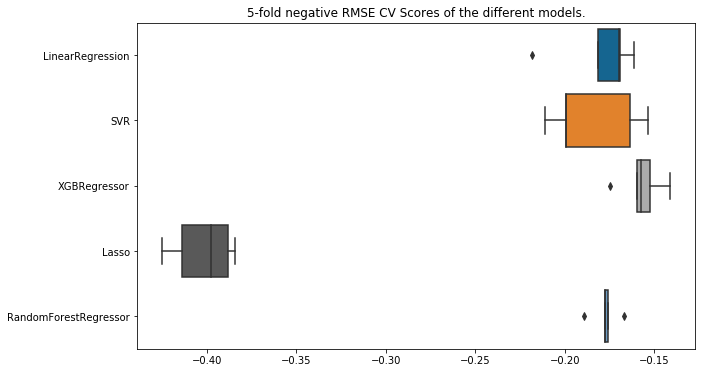

In [34]:
with plt.style.context('tableau-colorblind10'):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.boxplot(orient='h', data=results, ax=ax)
    plt.title(f"{N_SPLITS}-fold negative RMSE CV Scores of the different models.")
    plt.show()

### Tuning the best model

In [35]:
# Set hyperparams grid
hyperparams_grid = {
                    'xgbregressor__colsample_bylevel': [0.6, 0.7, 0.8],
                    'xgbregressor__max_depth': [2, 3, 4, 5],
                    'xgbregressor__subsample': [0.6, 0.8, 0.9],
                    'xgbregressor__learning_rate': [0.06]
                    }

# instantiate grid search
gs = GridSearchCV(best_model, param_grid=hyperparams_grid, cv=cv,
                  scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# search
gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   11.4s finished


[08:25:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pipeline', Pipeline(memory=None,
     steps=[('columnselector', ColumnSelector(cols=['BsmtFinSF2', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'OpenPorchSF', 'ScreenPorch', 'MiscVal', 'YearBuilt', 'MSSubClass', 'OverallQual', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', '3SsnPor...lpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'xgbregressor__colsample_bylevel': [0.6, 0.7, 0.8], 'xgbregressor__max_depth': [2, 3, 4, 5], 'xgbregressor__subsample': [0.6, 0.8, 0.9], 'xgbregressor__learning_rate': [0.06]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [36]:
# best score
best_rmse = np.sqrt(-gs.best_score_)

print(f"Best CV RMSE {best_rmse:.5f}")

Best CV RMSE 0.15848


In [37]:
# best fitted model
best_model = gs.best_estimator_

# Evaluate best model on test set
y_test_pred = best_model.predict(X_test)

rmse_test = np.sqrt(MSE(y_test, y_test_pred))

print(f"Test set RMSE: {rmse_test:.5f}")

Test set RMSE: 0.14590


## 8. Model Validation

### Learning Curves

In [38]:
def plot_learning_curves(model, X, y, cv, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, 
                                                            train_sizes= np.arange(0.1, 1.1, 0.1),
                                                            scoring=scoring,
                                                            cv=cv, 
                                                            n_jobs=-1)
    train_scores_mean = np.sqrt(-train_scores).mean(axis=1)
    train_scores_std =  np.sqrt(-train_scores).std(axis=1)
    test_scores_mean = np.sqrt(-test_scores).mean(axis=1)
    test_scores_std = np.sqrt(-test_scores).std(axis=1)
    
    
    with plt.style.context('fivethirtyeight'):
        plt.figure(figsize=(12,8))
        plt.title(f"Learning Curve for {best_model.named_steps['xgbregressor'].__class__.__name__}")
        plt.plot(train_sizes, train_scores_mean, label='train')
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                         train_scores_mean + train_scores_std, alpha=0.3)
        plt.plot(train_sizes, test_scores_mean, label='test')
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.3)
        plt.xlabel('Training set size')
        plt.ylabel('RMSE')
        plt.legend(loc='best')
        plt.show()

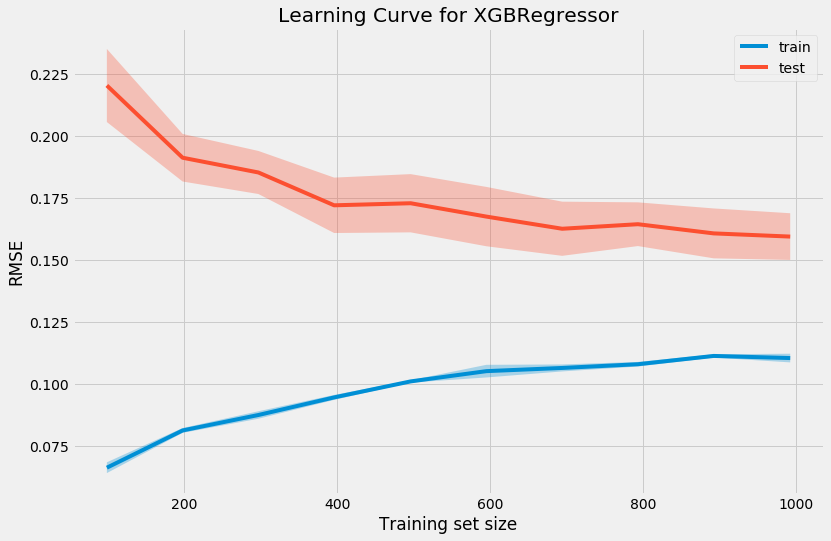

In [39]:
plot_learning_curves(best_model, X_train, y_train, cv=cv)

### Residual Plot

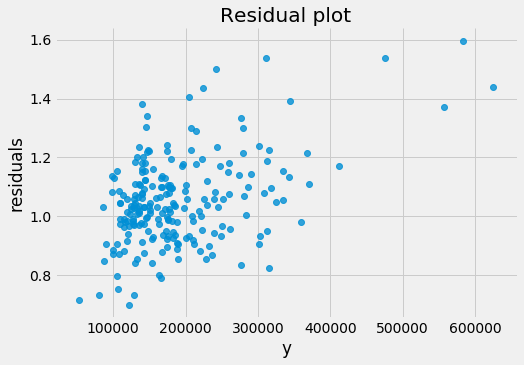

In [54]:
resid_df = pd.DataFrame({'y': np.exp(y_test), 'residuals': np.exp(y_test - y_test_pred)})

with plt.style.context('fivethirtyeight'):
    sns.lmplot(x='y', y='residuals', data=resid_df, fit_reg=False, aspect=1.5)
    plt.title("Residual plot")
    plt.show()

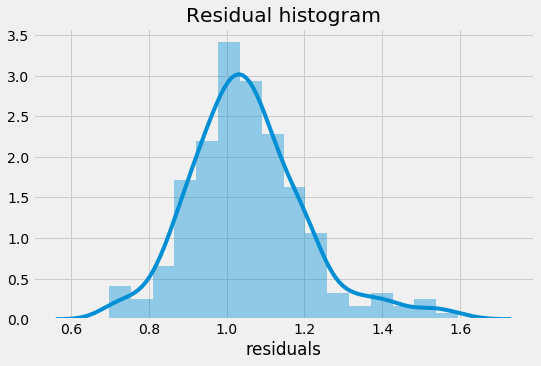

In [55]:
with plt.style.context('fivethirtyeight'):
    fig, ax =  plt.subplots(figsize=(8,5))
    sns.distplot(resid_df['residuals'])
    plt.title("Residual histogram")
    plt.show()